In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
import dgl_functions
from dgl_functions import *
import dgl_models
from dgl_models import *

In [4]:
from custom_models_fingerprints import *

In [5]:
use_fingerprints = False

apply_scaffold_split = True

create_new_data = False

In [6]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "DGL"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_dgl_regression_no_res_no_batch/model_gnn_conv"
    else:
        filename_basic = "results_dgl_regression_no_res_no_batch/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_dgl_regression_scaffold_no_res_no_batch/model_gnn_conv"
    else:
        filename_basic = "results_dgl_regression_scaffold_no_res_no_batch/model_gnn_conv"

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [7]:
param_combinations = dict()

hidden_channels_list = [[64], [256], [512]]
linear_sizes_list = [[], [512], [512, 256]]
gcn_layers_list = [1, 2, 3, 4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

In [8]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

In [9]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [10]:
batch_size = 64

In [11]:
print(len(combinations))

108


In [12]:
param_combinations = dict()

hidden_feats = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64], [128], [128, 128], [128, 128, 128], [128, 128, 128, 128], [256], [256, 256], [256, 256, 256], [256, 256, 256, 256], [512], [512, 512], [512, 512, 512], [512, 512, 512, 512]]

predictor_hidden_feats = [128, 256, 512, 1024]
keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [13]:
param_combinations = dict()


param_combinations["hidden_feats"] = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64], [128], [128, 128], [128, 128, 128], [128, 128, 128, 128], [256], [256, 256], [256, 256, 256], [256, 256, 256, 256], [512], [512, 512], [512, 512, 512], [512, 512, 512, 512]]
param_combinations["predictor_hidden_feats"] = [128, 256, 512, 1024]
apply_scaffold_split_list = [apply_scaffold_split]
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

run: 0
{'hidden_feats': [64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790201E80>, <dgl.data.utils.Subset object at 0x000001B790C748E0>, <dgl.data.utils.Subset object at 0x000001B790C74B50>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=128, out_features=128, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(128, eps=1e-05, momentum=0.1

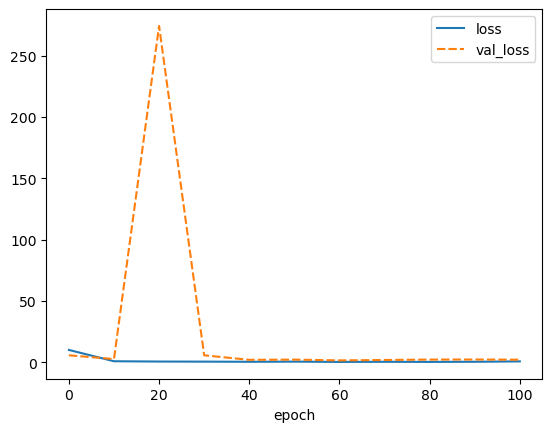

best weights loaded


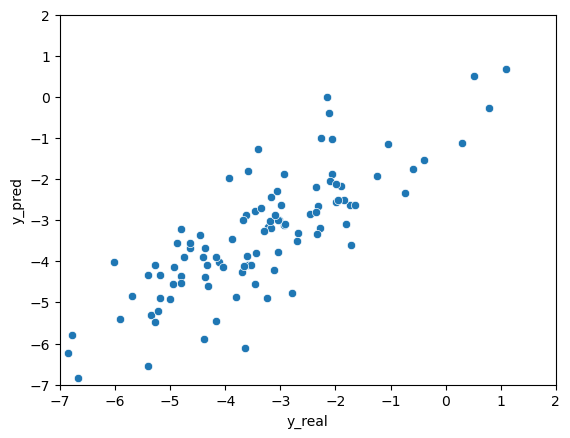

elapsed time: 42.824421882629395
run: 1
{'hidden_feats': [64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790BDC100>, <dgl.data.utils.Subset object at 0x000001B878BD65B0>, <dgl.data.utils.Subset object at 0x000001B878BD05B0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=128, out_features=256, bias=True)
      (2): ReLU()
      (3): BatchNo

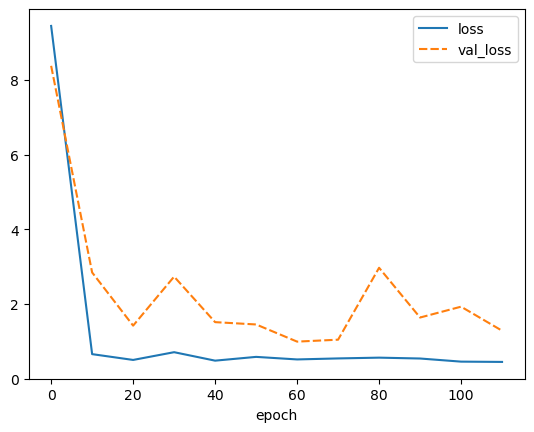

best weights loaded


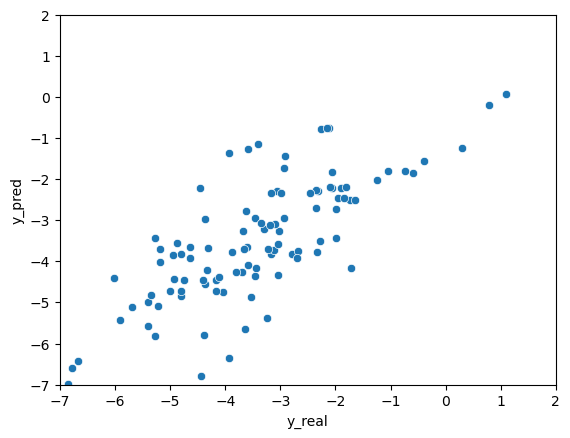

elapsed time: 38.41923666000366
run: 2
{'hidden_feats': [64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790684F70>, <dgl.data.utils.Subset object at 0x000001B879D2C220>, <dgl.data.utils.Subset object at 0x000001B879D2C490>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=128, out_features=512, bias=True)
      (2): ReLU()
      (3): BatchNor

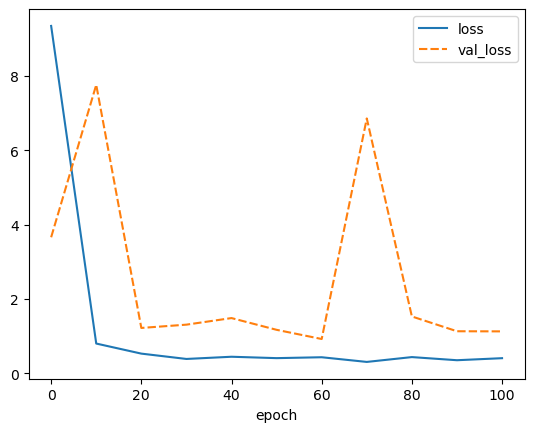

best weights loaded


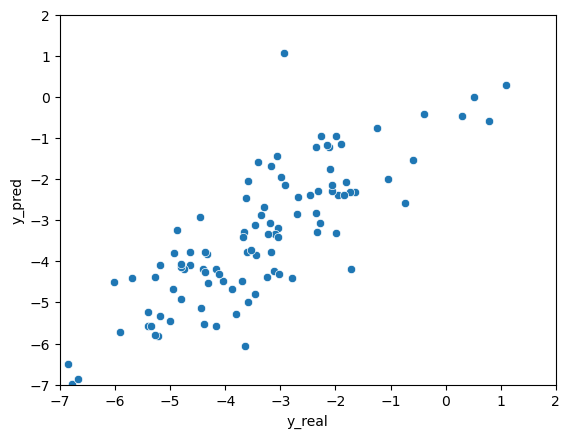

elapsed time: 34.098961353302
run: 3
{'hidden_feats': [64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B7906965E0>, <dgl.data.utils.Subset object at 0x000001B879CA8190>, <dgl.data.utils.Subset object at 0x000001B879CA8C10>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=128, out_features=1024, bias=True)
      (2): ReLU()
      (3): BatchNor

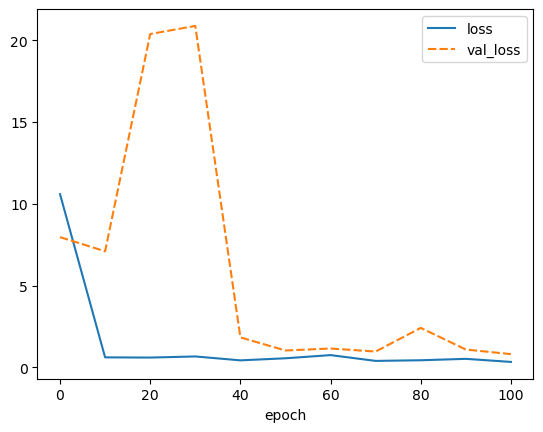

best weights loaded


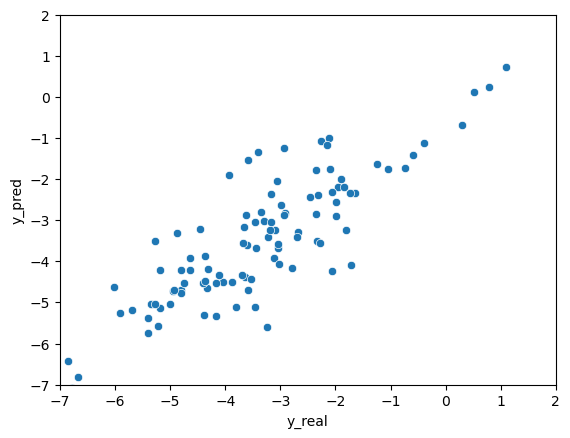

elapsed time: 36.63687324523926
run: 4
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B7E8EACD60>, <dgl.data.utils.Subset object at 0x000001B878B0F970>, <dgl.data.utils.Subset object at 0x000001B878B0FA60>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
 

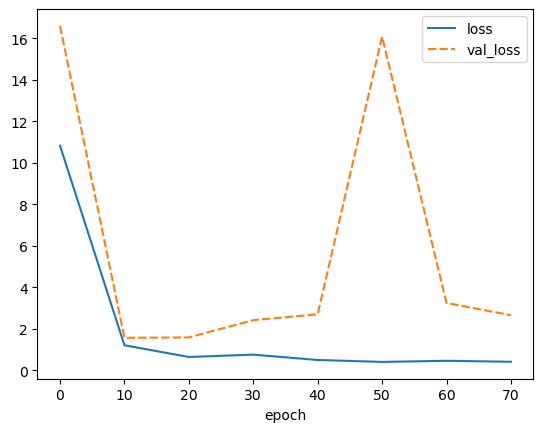

best weights loaded


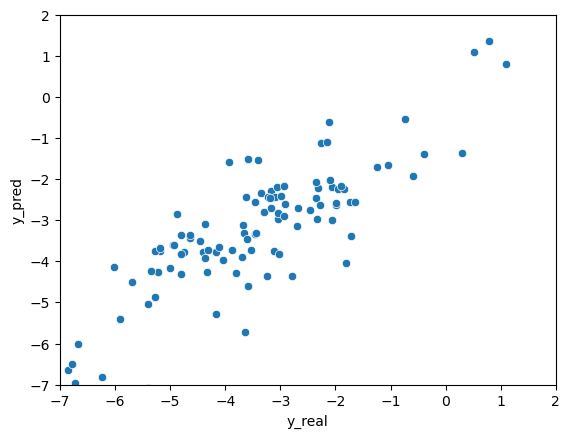

elapsed time: 28.874449729919434
run: 5
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B79076D580>, <dgl.data.utils.Subset object at 0x000001B878B1F430>, <dgl.data.utils.Subset object at 0x000001B878B1F6A0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )


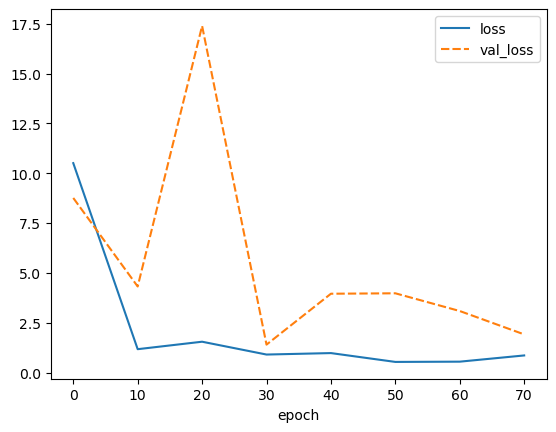

best weights loaded


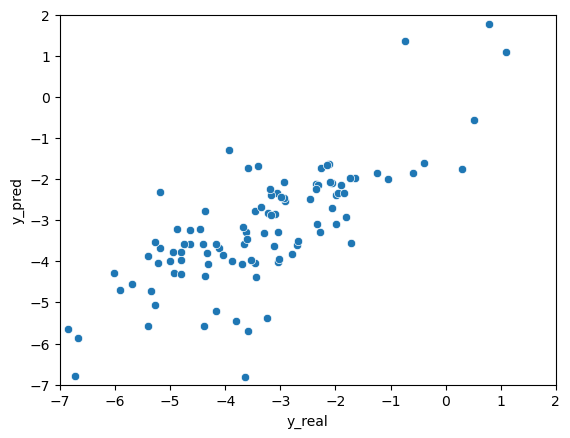

elapsed time: 36.53202295303345
run: 6
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790B85D90>, <dgl.data.utils.Subset object at 0x000001B87BD75E20>, <dgl.data.utils.Subset object at 0x000001B87BD7B0D0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
 

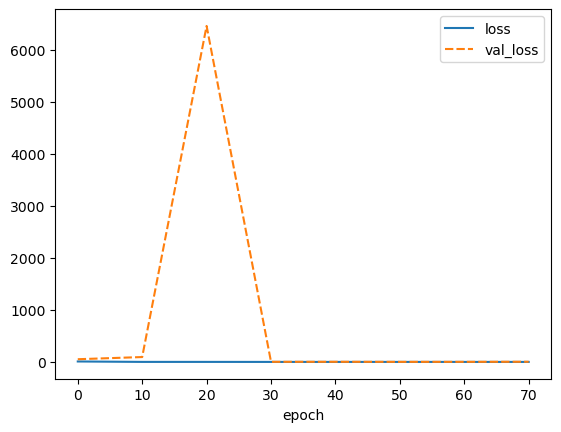

best weights loaded


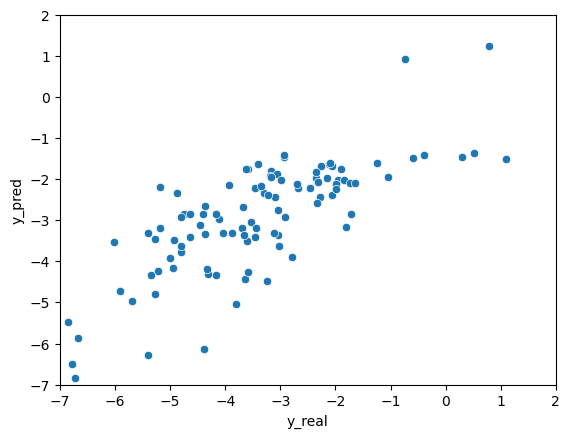

elapsed time: 34.085564374923706
run: 7
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790A03A30>, <dgl.data.utils.Subset object at 0x000001B879CDB760>, <dgl.data.utils.Subset object at 0x000001B879CDB310>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )

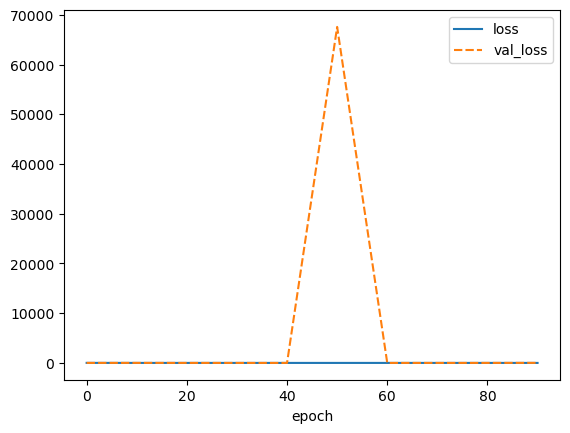

best weights loaded


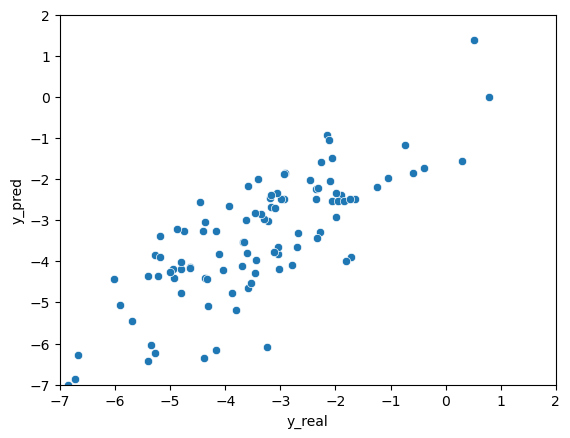

elapsed time: 37.635982513427734
run: 8
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790B95F10>, <dgl.data.utils.Subset object at 0x000001B879CD9FD0>, <dgl.data.utils.Subset object at 0x000001B879CC23D0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
    

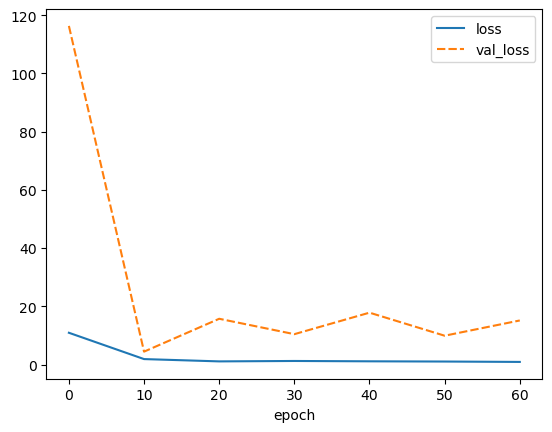

best weights loaded


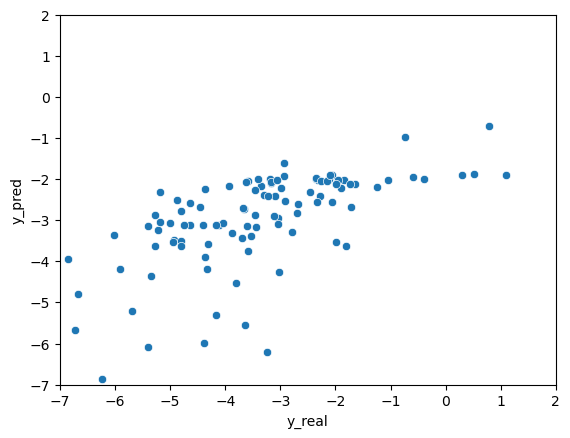

elapsed time: 28.000916004180908
run: 9
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B79093F0D0>, <dgl.data.utils.Subset object at 0x000001B87BE07A60>, <dgl.data.utils.Subset object at 0x000001B87BE07CD0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
    

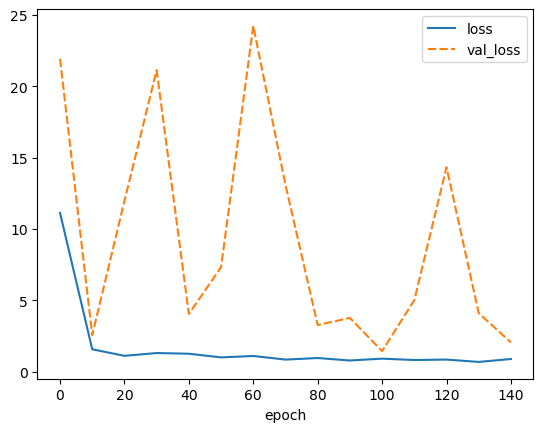

best weights loaded


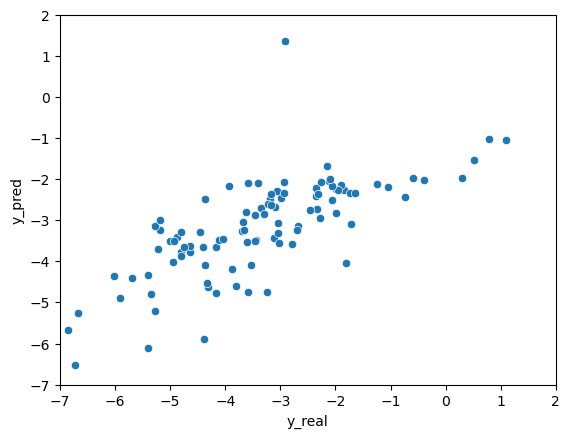

elapsed time: 65.23527121543884
run: 10
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B7907B34F0>, <dgl.data.utils.Subset object at 0x000001B879CDBFA0>, <dgl.data.utils.Subset object at 0x000001B879CDB340>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
    

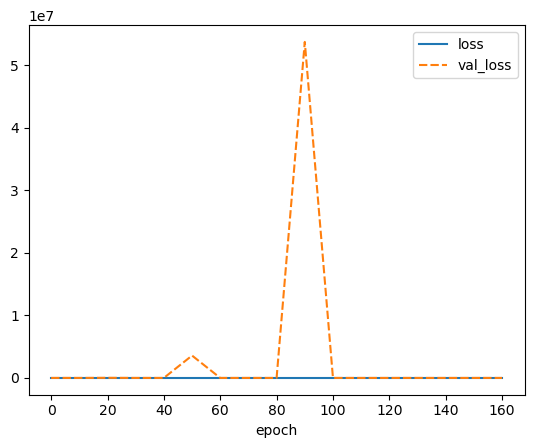

best weights loaded


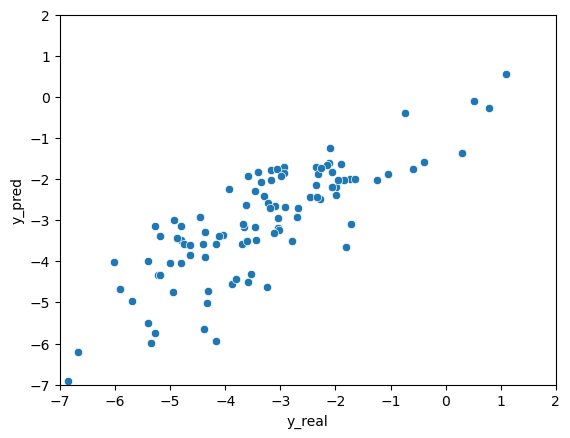

elapsed time: 72.64742684364319
run: 11
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B79072FDF0>, <dgl.data.utils.Subset object at 0x000001B879C5BDC0>, <dgl.data.utils.Subset object at 0x000001B879C5BE80>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
   

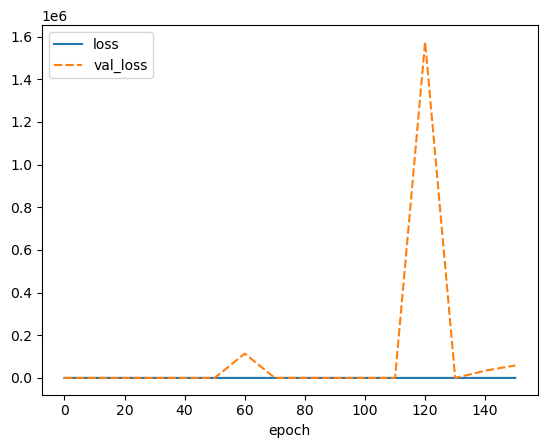

best weights loaded


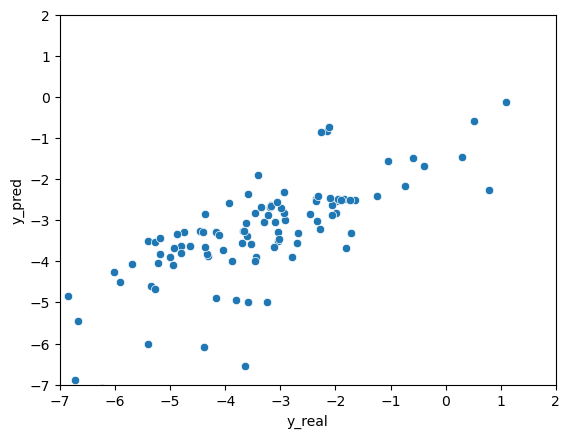

elapsed time: 64.9454779624939
run: 12
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B7909A34C0>, <dgl.data.utils.Subset object at 0x000001B7E4EBCDC0>, <dgl.data.utils.Subset object at 0x000001B7E4E8B070>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
 

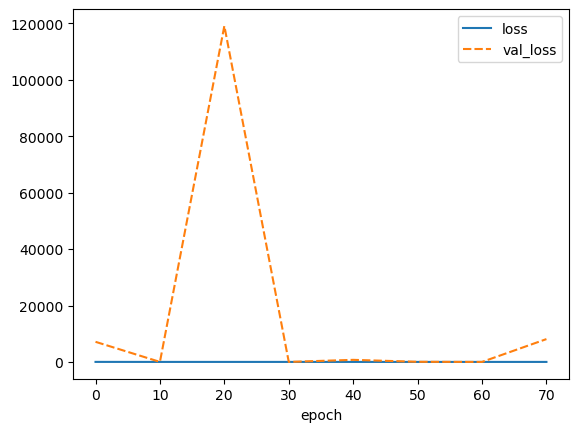

best weights loaded


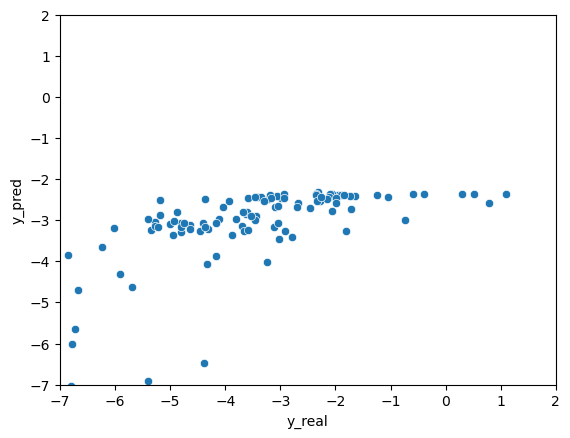

elapsed time: 36.34452295303345
run: 13
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B8788FCDC0>, <dgl.data.utils.Subset object at 0x000001B7909A3EE0>, <dgl.data.utils.Subset object at 0x000001B7E4E8B1F0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()


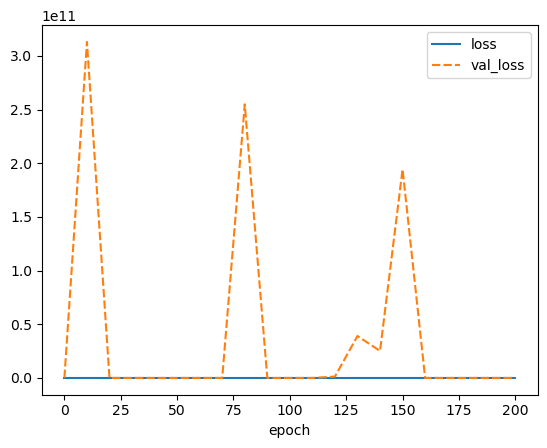

best weights loaded


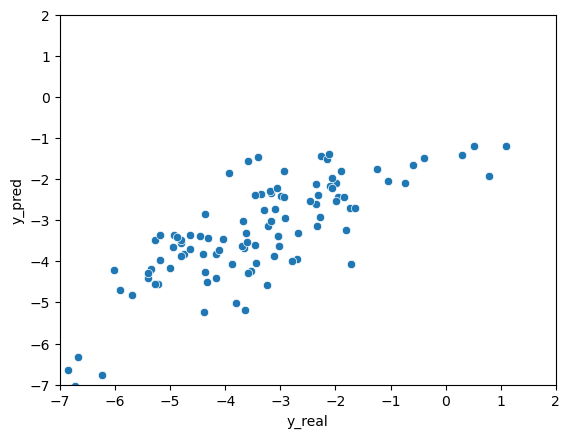

elapsed time: 95.74255132675171
run: 14
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B79075C5E0>, <dgl.data.utils.Subset object at 0x000001B878BA8400>, <dgl.data.utils.Subset object at 0x000001B878BA8730>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()


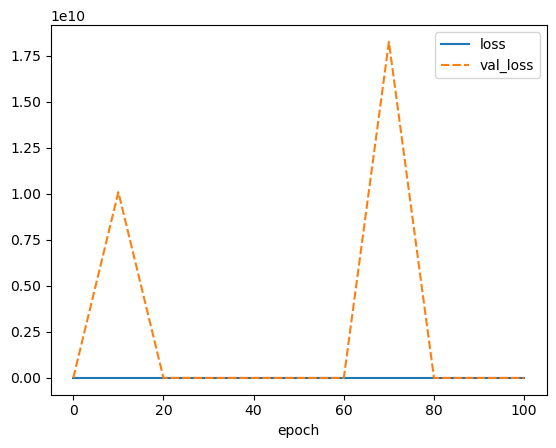

best weights loaded


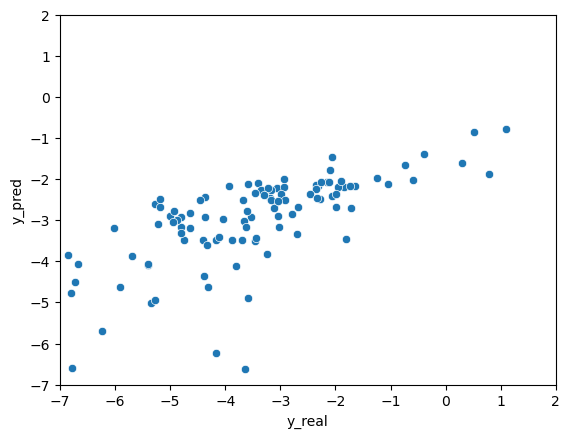

elapsed time: 49.547969341278076
run: 15
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B878AA0400>, <dgl.data.utils.Subset object at 0x000001B87BDAEC70>, <dgl.data.utils.Subset object at 0x000001B790A991F0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid(

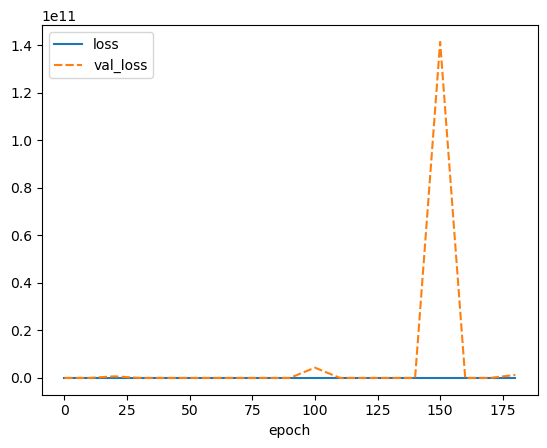

best weights loaded


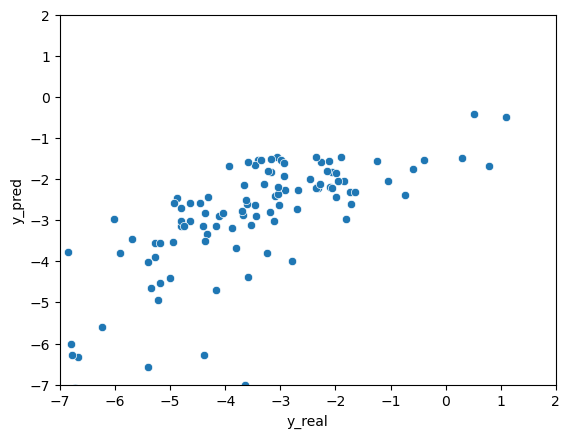

elapsed time: 83.30669856071472
run: 16
{'hidden_feats': [128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B878982040>, <dgl.data.utils.Subset object at 0x000001B87BDD4400>, <dgl.data.utils.Subset object at 0x000001B87BDD4610>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=256, out_features=128, bias=True)
      (2): ReLU()
      (3): Batc

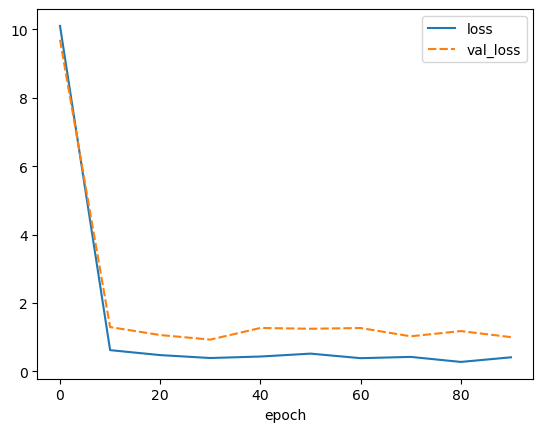

best weights loaded


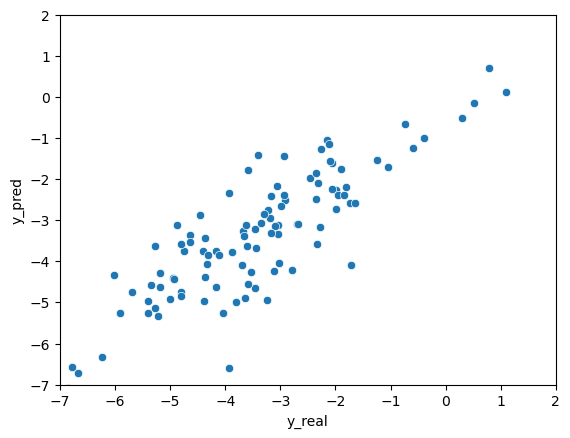

elapsed time: 27.412723779678345
run: 17
{'hidden_feats': [128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790AA98E0>, <dgl.data.utils.Subset object at 0x000001B8788B85B0>, <dgl.data.utils.Subset object at 0x000001B8788B8820>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=256, out_features=256, bias=True)
      (2): ReLU()
      (3): Bat

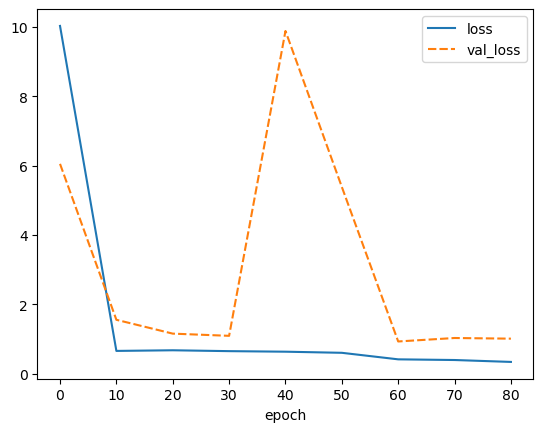

best weights loaded


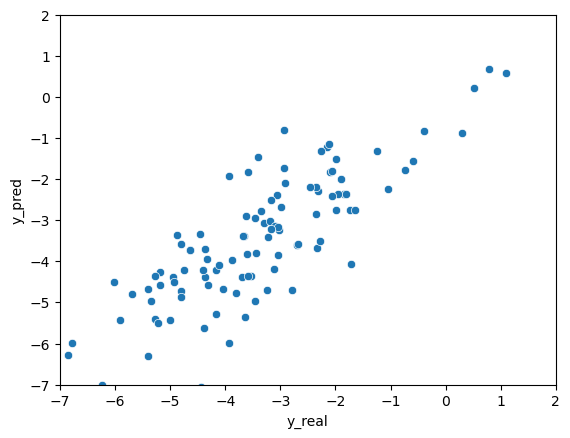

elapsed time: 26.652676820755005
run: 18
{'hidden_feats': [128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B79092BBE0>, <dgl.data.utils.Subset object at 0x000001B7909CFFA0>, <dgl.data.utils.Subset object at 0x000001B7909CF8E0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=256, out_features=512, bias=True)
      (2): ReLU()
      (3): Bat

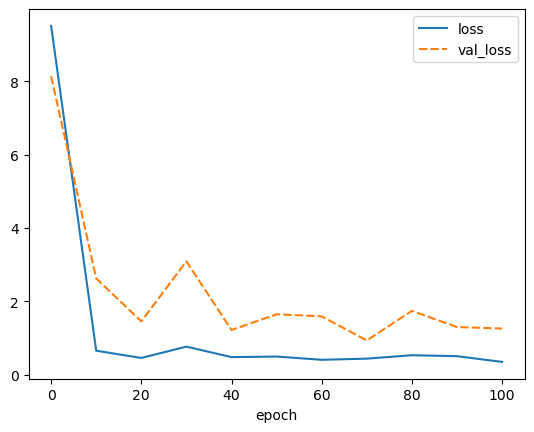

best weights loaded


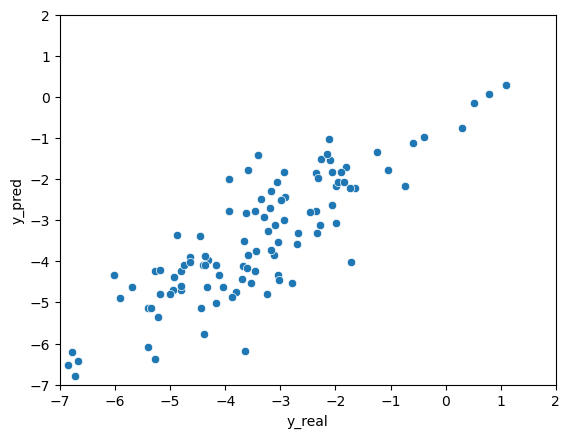

elapsed time: 30.86296582221985
run: 19
{'hidden_feats': [128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790BA85B0>, <dgl.data.utils.Subset object at 0x000001B878A3A460>, <dgl.data.utils.Subset object at 0x000001B878A3A6D0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=256, out_features=1024, bias=True)
      (2): ReLU()
      (3): Ba

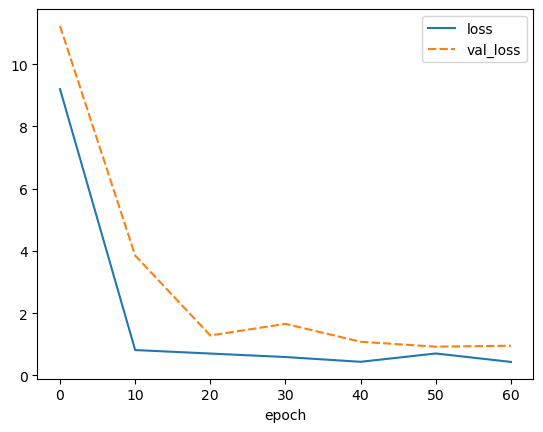

best weights loaded


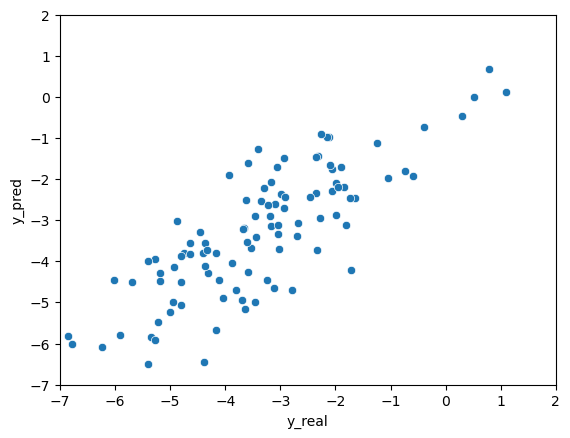

elapsed time: 23.054847478866577
run: 20
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790661BB0>, <dgl.data.utils.Subset object at 0x000001B87BE5D130>, <dgl.data.utils.Subset object at 0x000001B87BE5D3A0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )

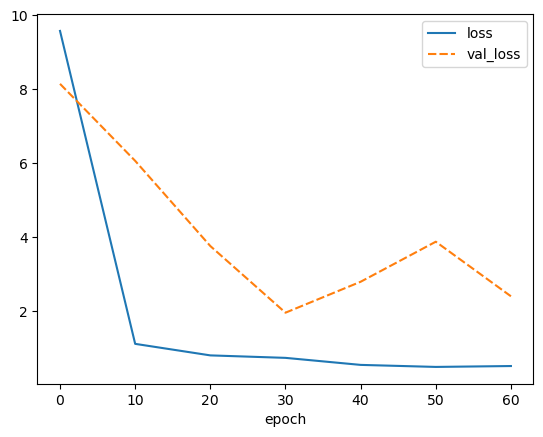

best weights loaded


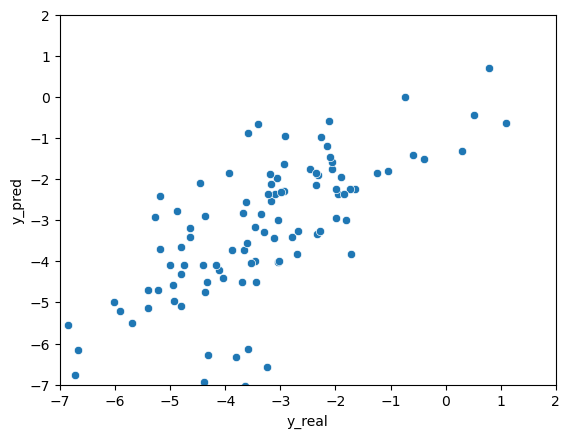

elapsed time: 25.194830417633057
run: 21
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B878AEC8E0>, <dgl.data.utils.Subset object at 0x000001B7E31E6100>, <dgl.data.utils.Subset object at 0x000001B790AD1580>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )

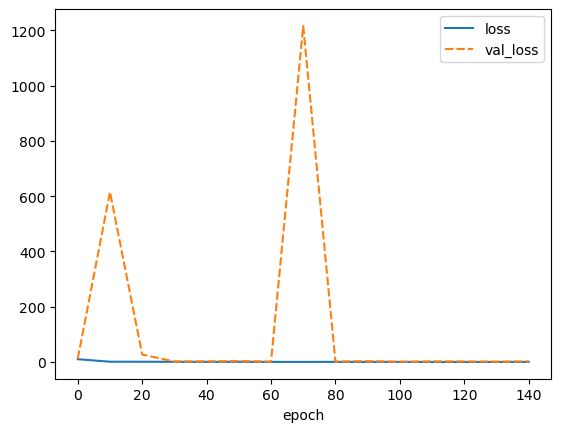

best weights loaded


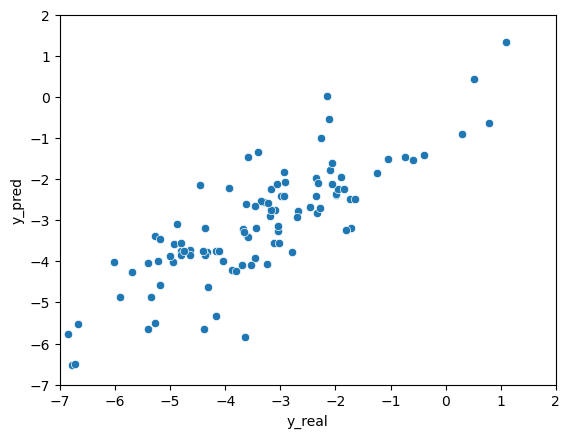

elapsed time: 57.329747676849365
run: 22
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B8789383A0>, <dgl.data.utils.Subset object at 0x000001B879D57610>, <dgl.data.utils.Subset object at 0x000001B7908B73A0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )

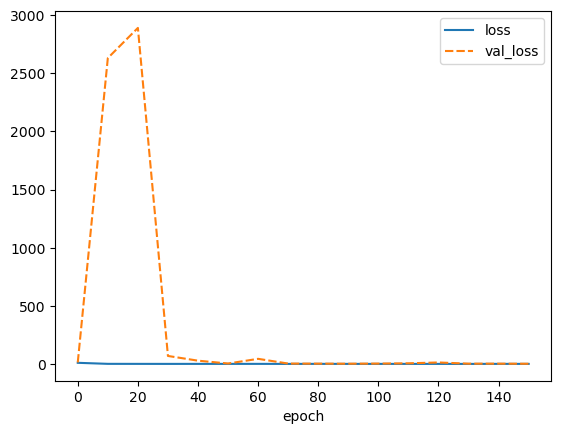

best weights loaded


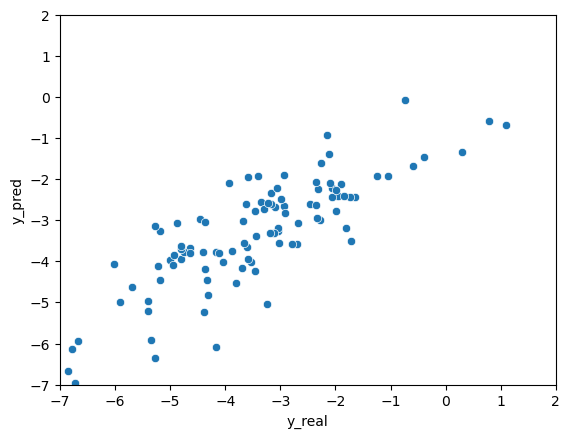

elapsed time: 54.06231451034546
run: 23
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B878A09940>, <dgl.data.utils.Subset object at 0x000001B878B9E250>, <dgl.data.utils.Subset object at 0x000001B878B9E460>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )

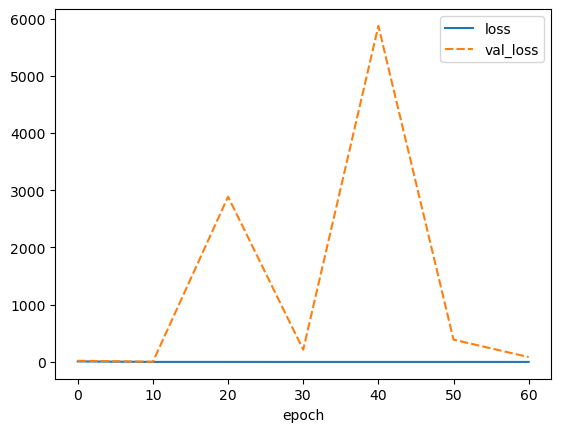

best weights loaded


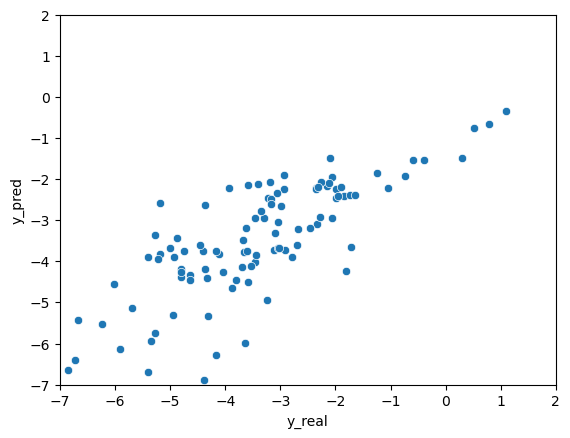

elapsed time: 21.63617253303528
run: 24
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790BD0310>, <dgl.data.utils.Subset object at 0x000001B79069CBB0>, <dgl.data.utils.Subset object at 0x000001B878B9E6D0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid

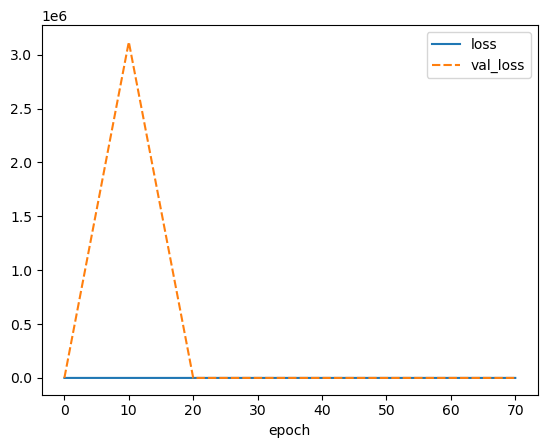

best weights loaded


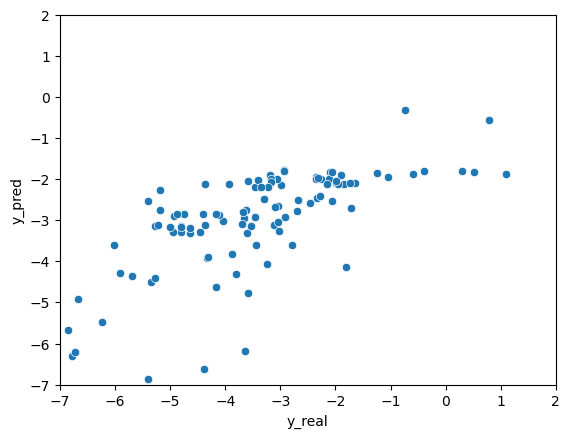

elapsed time: 34.160133361816406
run: 25
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790AF03D0>, <dgl.data.utils.Subset object at 0x000001B879D35910>, <dgl.data.utils.Subset object at 0x000001B879D35C10>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoi

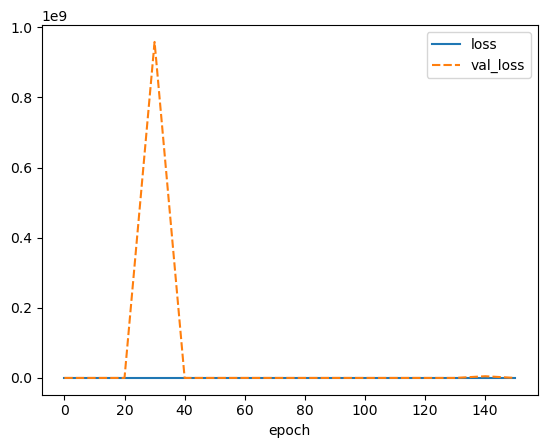

best weights loaded


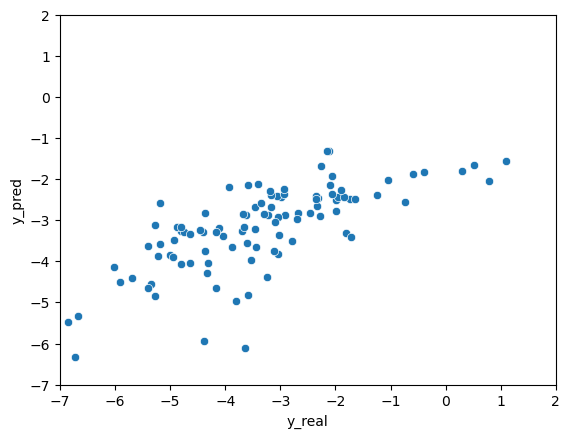

elapsed time: 68.55020642280579
run: 26
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B7906FE940>, <dgl.data.utils.Subset object at 0x000001B7E40B6460>, <dgl.data.utils.Subset object at 0x000001B7E40B68B0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid

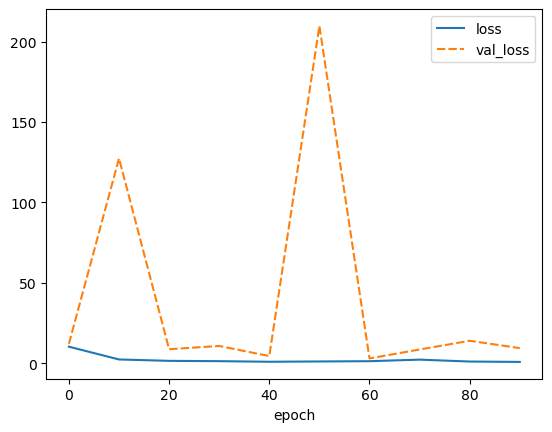

best weights loaded


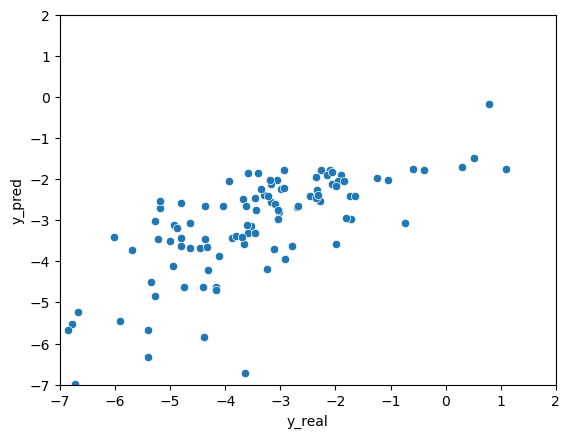

elapsed time: 40.914546251297
run: 27
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790A453A0>, <dgl.data.utils.Subset object at 0x000001B87BDF0F10>, <dgl.data.utils.Subset object at 0x000001B87BDF02B0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid(

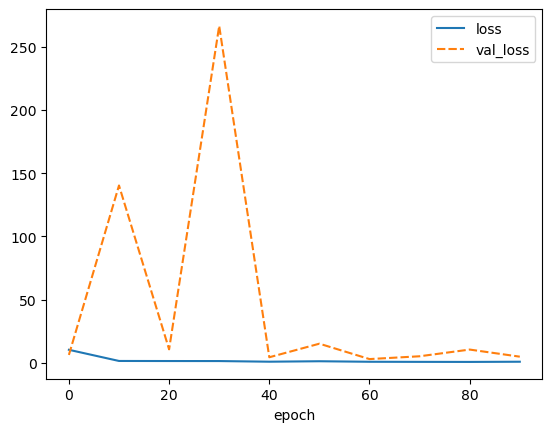

best weights loaded


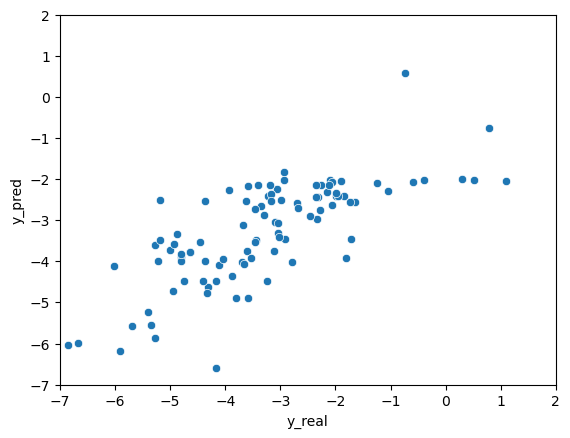

elapsed time: 40.95733451843262
run: 28
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790980820>, <dgl.data.utils.Subset object at 0x000001B7907F79A0>, <dgl.data.utils.Subset object at 0x000001B7907F7C10>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Si

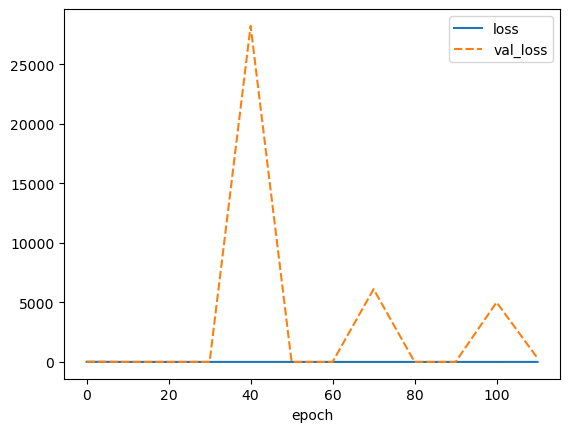

best weights loaded


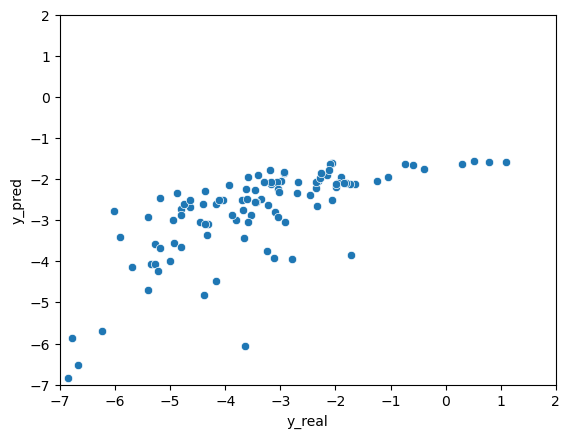

elapsed time: 51.79547429084778
run: 29
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790672730>, <dgl.data.utils.Subset object at 0x000001B790C849A0>, <dgl.data.utils.Subset object at 0x000001B790C842B0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Si

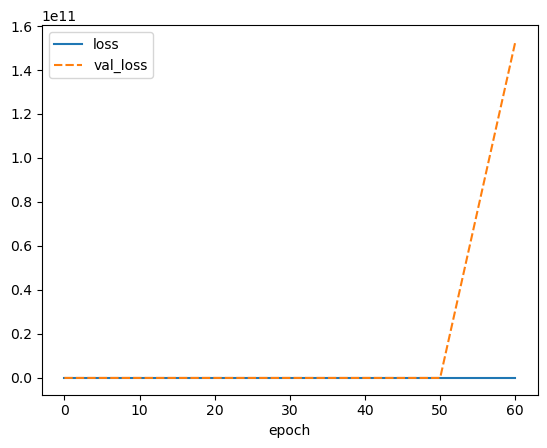

best weights loaded


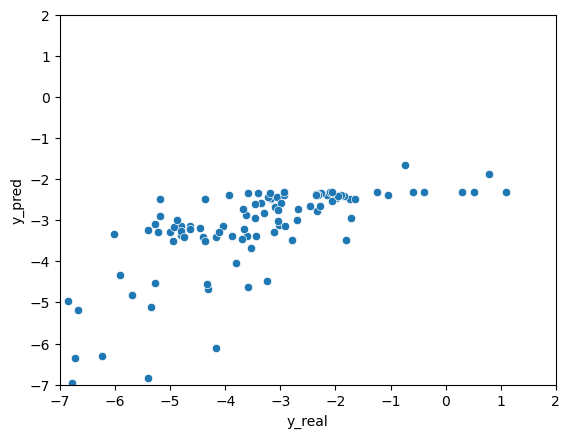

elapsed time: 31.038866996765137
run: 30
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B7E4C980A0>, <dgl.data.utils.Subset object at 0x000001B87BE3EA60>, <dgl.data.utils.Subset object at 0x000001B87BE3EAC0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): S

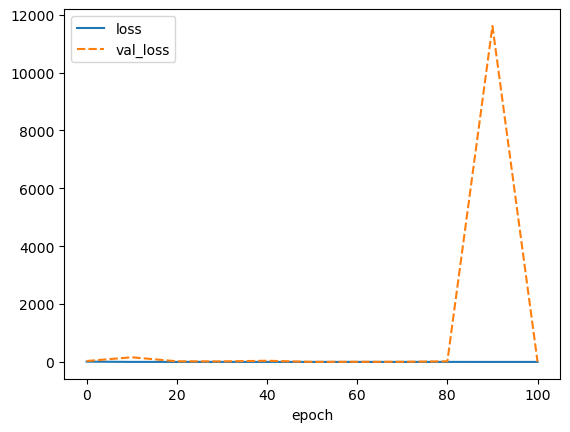

best weights loaded


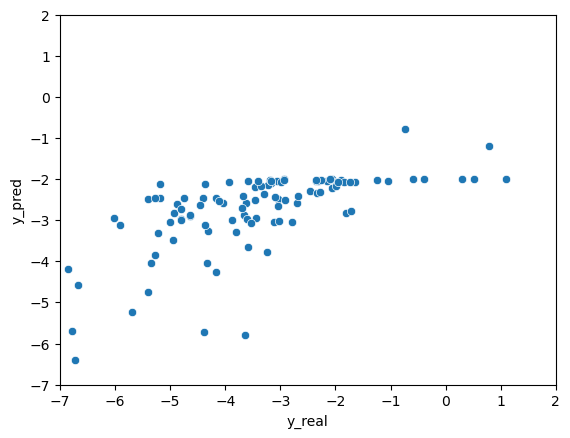

elapsed time: 46.82377743721008
run: 31
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790886760>, <dgl.data.utils.Subset object at 0x000001B87BDCDC70>, <dgl.data.utils.Subset object at 0x000001B87BDCD760>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): S

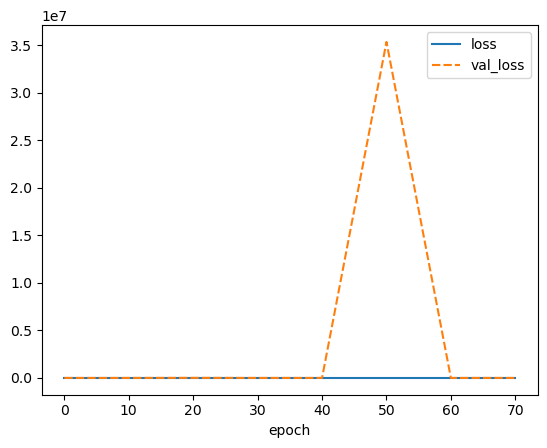

best weights loaded


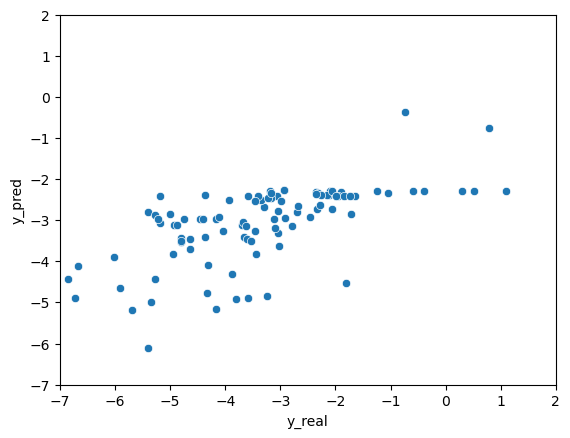

elapsed time: 34.4662971496582
run: 32
{'hidden_feats': [256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790A38CA0>, <dgl.data.utils.Subset object at 0x000001B790C70CD0>, <dgl.data.utils.Subset object at 0x000001B7907F72E0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=512, out_features=128, bias=True)
      (2): ReLU()
      (3): Batch

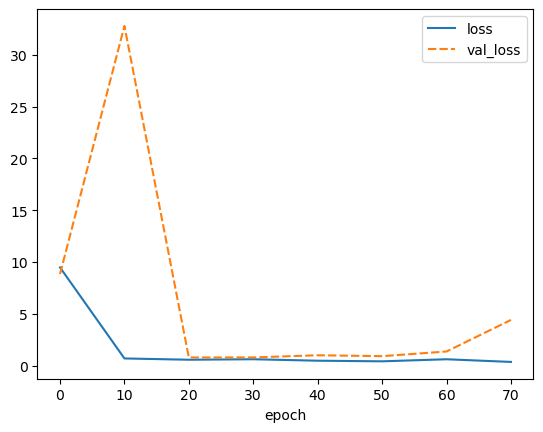

best weights loaded


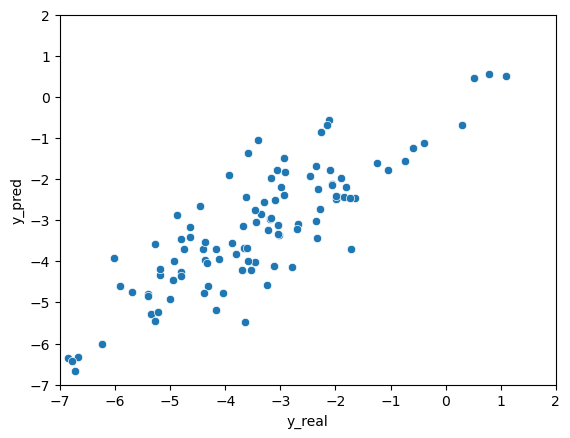

elapsed time: 25.76682448387146
run: 33
{'hidden_feats': [256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B8788C3B50>, <dgl.data.utils.Subset object at 0x000001B7E8E415B0>, <dgl.data.utils.Subset object at 0x000001B7E8E41820>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=512, out_features=256, bias=True)
      (2): ReLU()
      (3): Batc

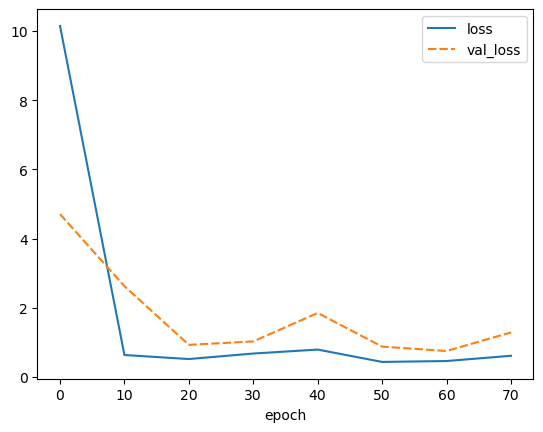

best weights loaded


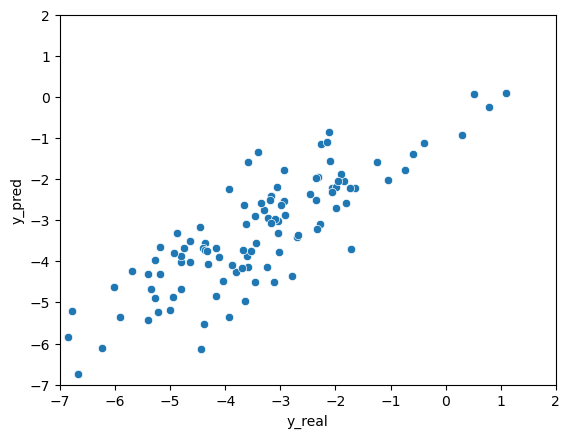

elapsed time: 26.73333716392517
run: 34
{'hidden_feats': [256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B878989D90>, <dgl.data.utils.Subset object at 0x000001B87BE291F0>, <dgl.data.utils.Subset object at 0x000001B87BE29460>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=512, out_features=512, bias=True)
      (2): ReLU()
      (3): Batc

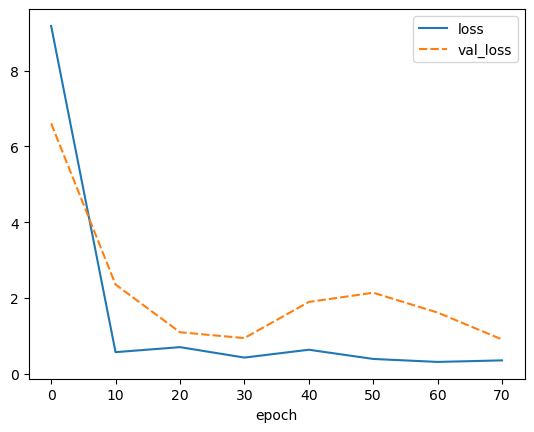

best weights loaded


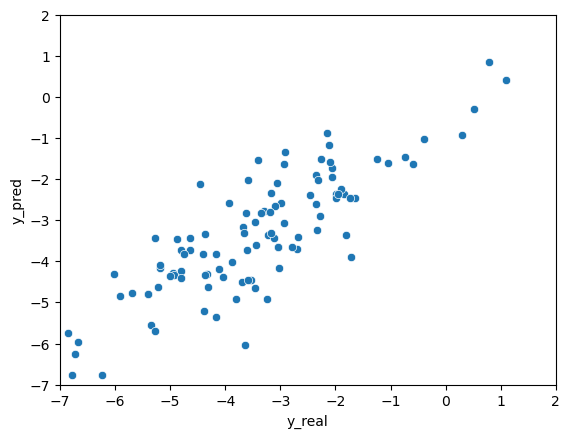

elapsed time: 25.645178079605103
run: 35
{'hidden_feats': [256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790A8F820>, <dgl.data.utils.Subset object at 0x000001B878B00850>, <dgl.data.utils.Subset object at 0x000001B7909A3820>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=512, out_features=1024, bias=True)
      (2): ReLU()
      (3): B

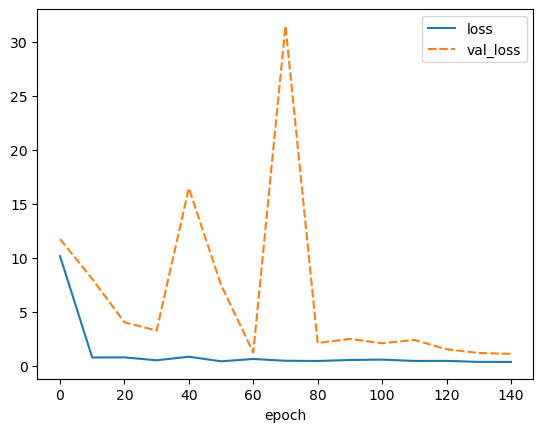

best weights loaded


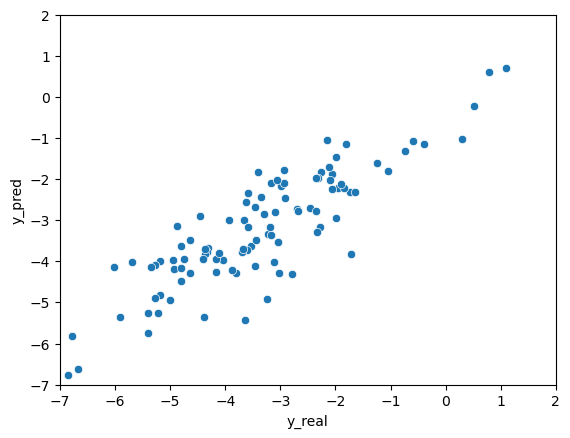

elapsed time: 44.27290058135986
run: 36
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790968970>, <dgl.data.utils.Subset object at 0x000001B878B8C6A0>, <dgl.data.utils.Subset object at 0x000001B878B8C910>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )


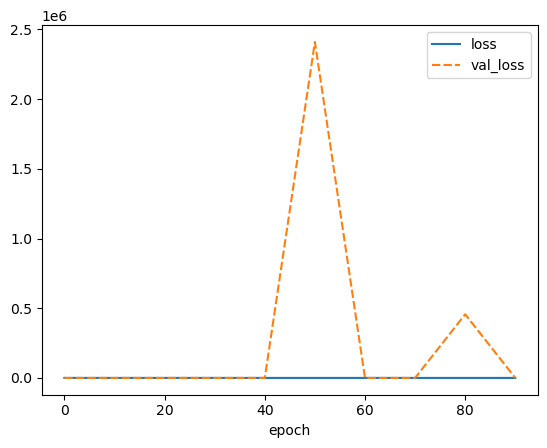

best weights loaded


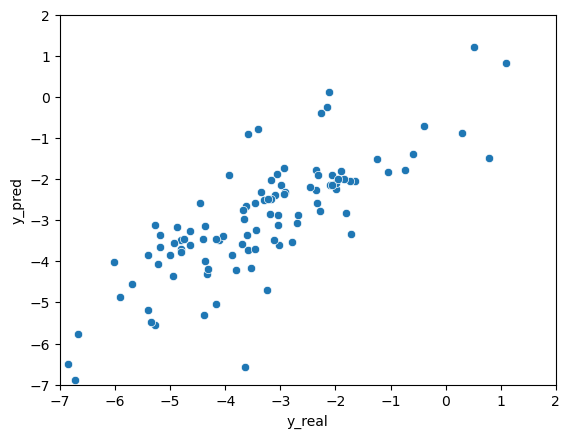

elapsed time: 34.92043113708496
run: 37
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790B5EA00>, <dgl.data.utils.Subset object at 0x000001B87D2EA8B0>, <dgl.data.utils.Subset object at 0x000001B87D2EAB20>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )


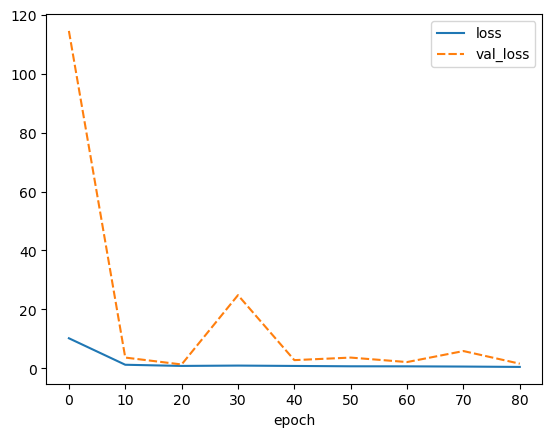

best weights loaded


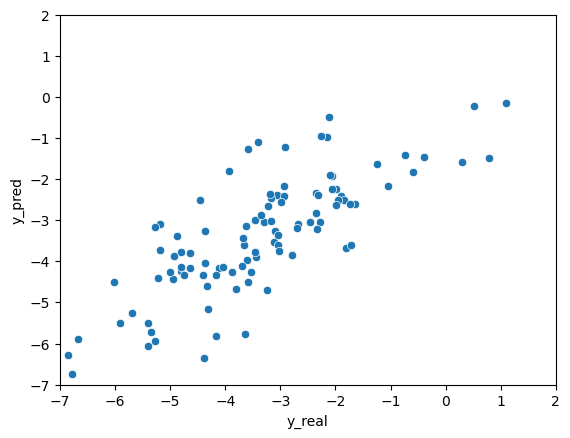

elapsed time: 37.18926239013672
run: 38
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B7909370D0>, <dgl.data.utils.Subset object at 0x000001B879D0DE20>, <dgl.data.utils.Subset object at 0x000001B879D0DEE0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )


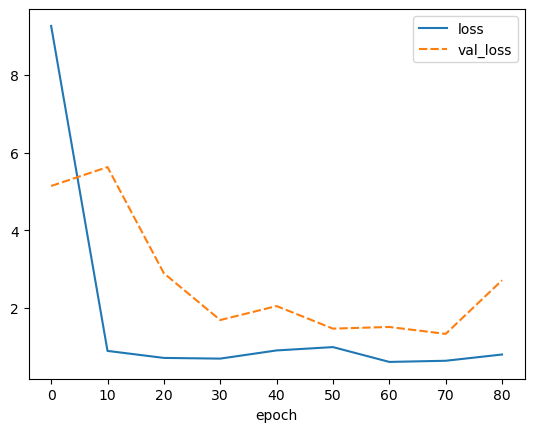

best weights loaded


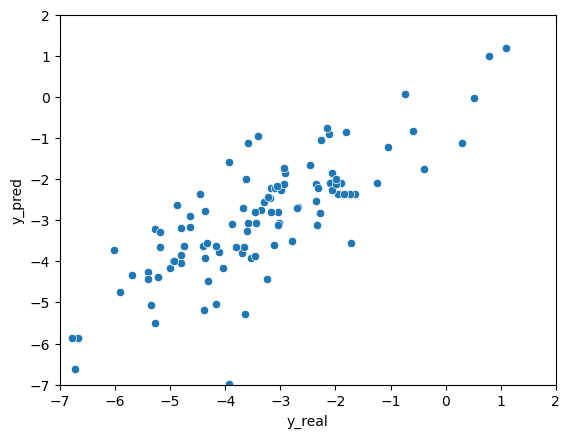

elapsed time: 44.54905414581299
run: 39
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B8789EC430>, <dgl.data.utils.Subset object at 0x000001B87D2C3A00>, <dgl.data.utils.Subset object at 0x000001B87D2C3DC0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )

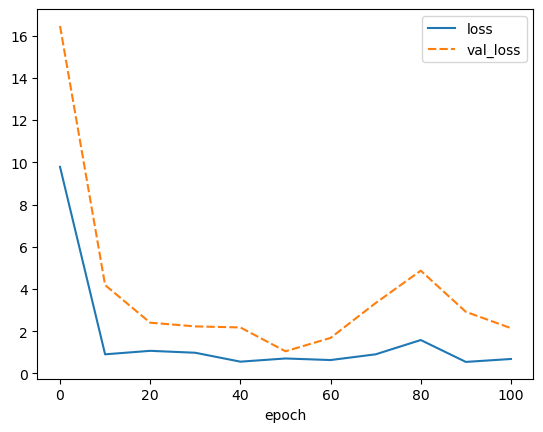

best weights loaded


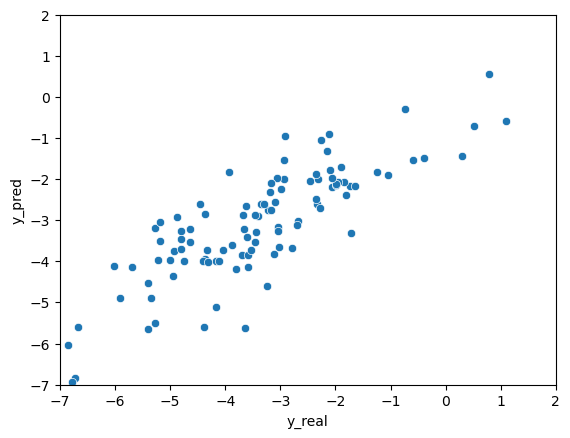

elapsed time: 49.23491168022156
run: 40
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B878B4D2E0>, <dgl.data.utils.Subset object at 0x000001B87D322430>, <dgl.data.utils.Subset object at 0x000001B87D3226A0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid

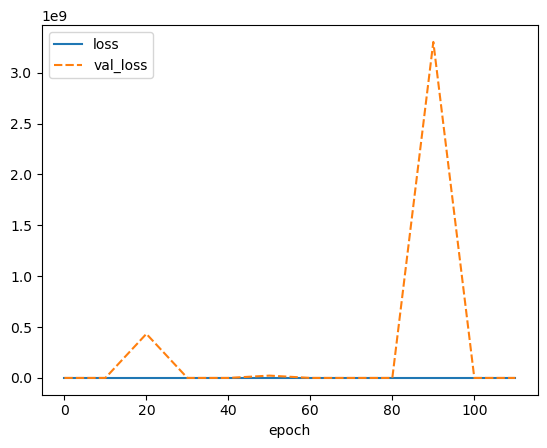

best weights loaded


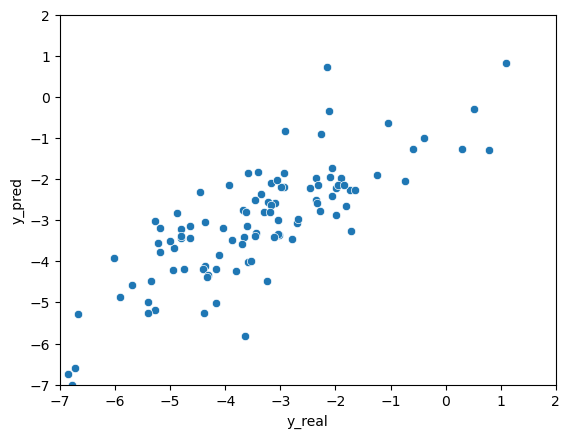

elapsed time: 54.1135618686676
run: 41
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B87880C5B0>, <dgl.data.utils.Subset object at 0x000001B879CEE7C0>, <dgl.data.utils.Subset object at 0x000001B879CEEBE0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid(

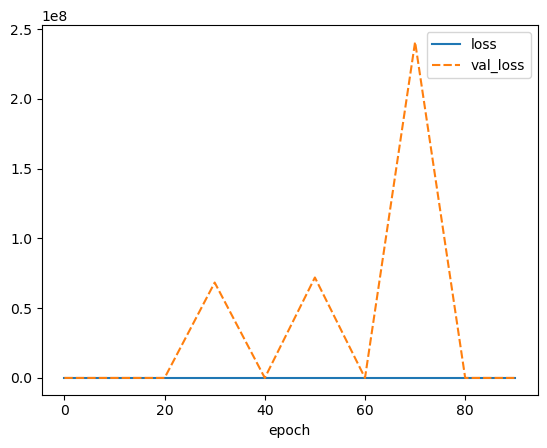

best weights loaded


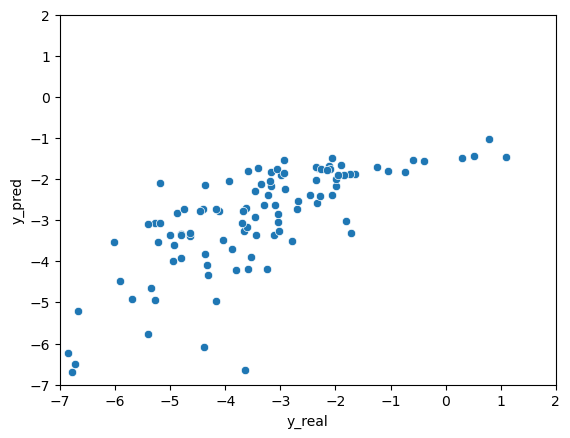

elapsed time: 52.475367307662964
run: 42
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B7E4E50190>, <dgl.data.utils.Subset object at 0x000001B87D319CA0>, <dgl.data.utils.Subset object at 0x000001B87D319670>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoi

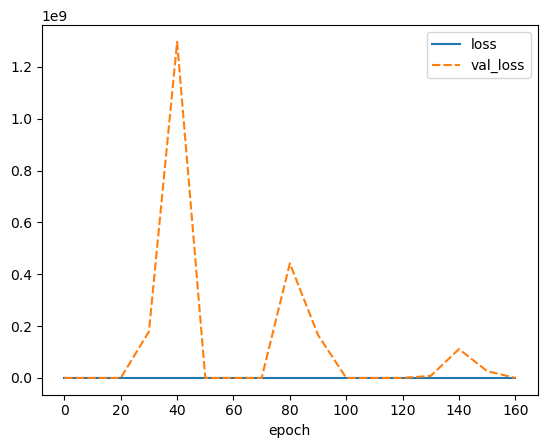

best weights loaded


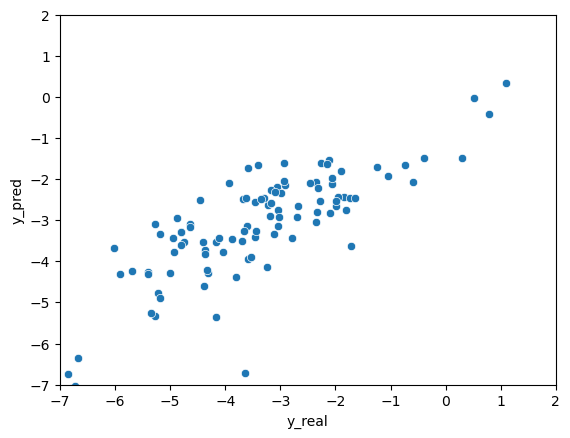

elapsed time: 71.19511246681213
run: 43
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B8788DD5B0>, <dgl.data.utils.Subset object at 0x000001B87D32E100>, <dgl.data.utils.Subset object at 0x000001B87D32E370>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoi

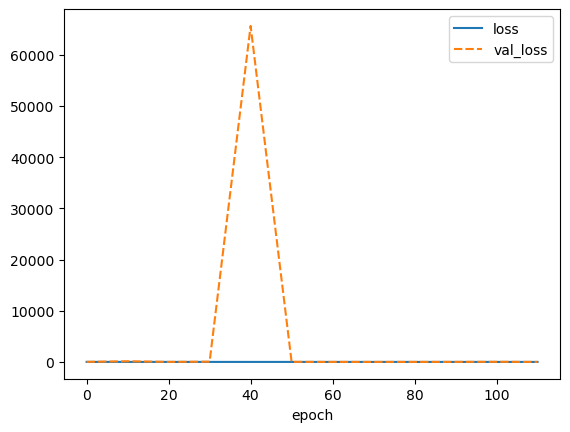

best weights loaded


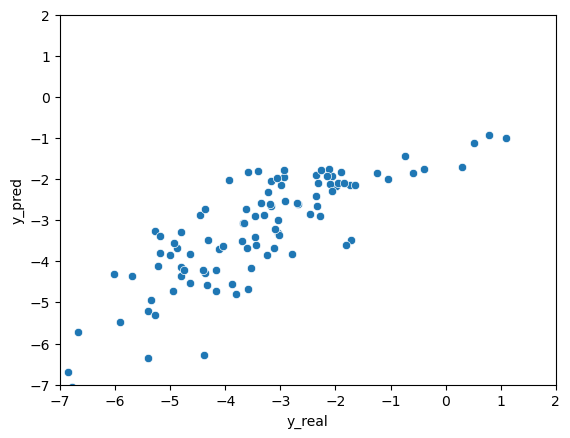

elapsed time: 58.886226415634155
run: 44
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B8787D2FD0>, <dgl.data.utils.Subset object at 0x000001B87D314A60>, <dgl.data.utils.Subset object at 0x000001B87D314A90>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): S

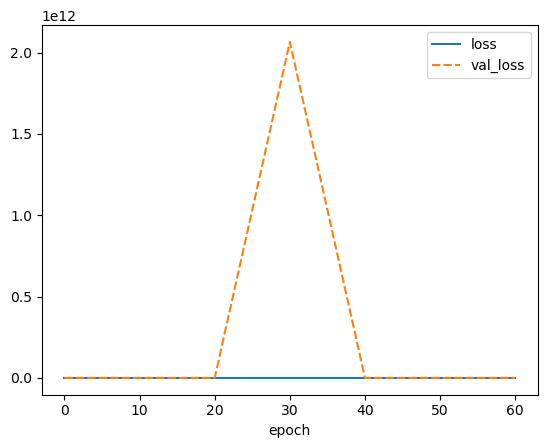

best weights loaded


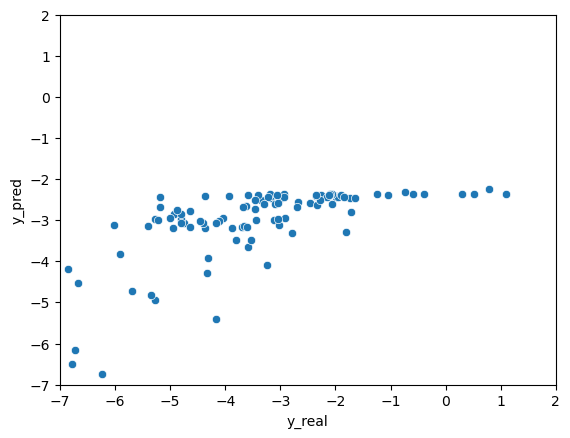

elapsed time: 40.31503176689148
run: 45
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B878961EB0>, <dgl.data.utils.Subset object at 0x000001B87D2DB820>, <dgl.data.utils.Subset object at 0x000001B87D2DB910>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Si

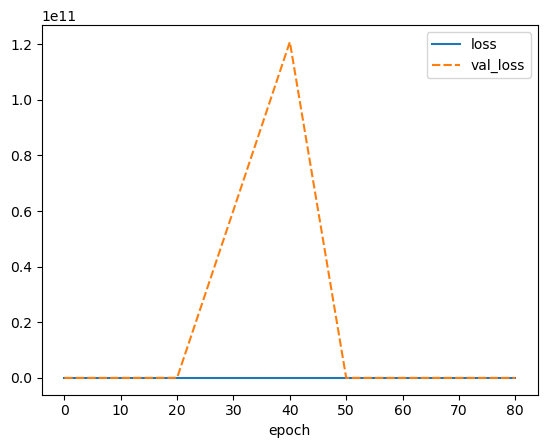

best weights loaded


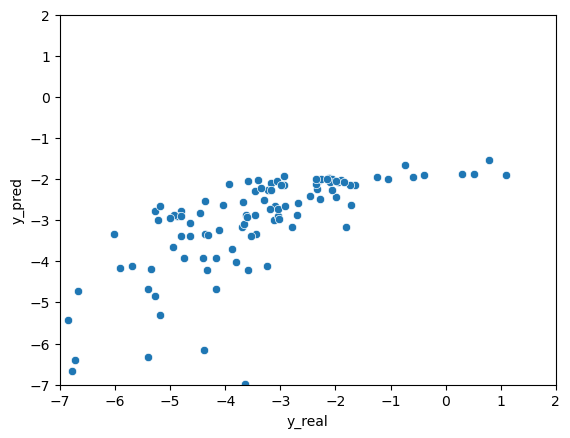

elapsed time: 47.14384078979492
run: 46
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B79084C130>, <dgl.data.utils.Subset object at 0x000001B87D2C3FA0>, <dgl.data.utils.Subset object at 0x000001B87D2A82E0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Si

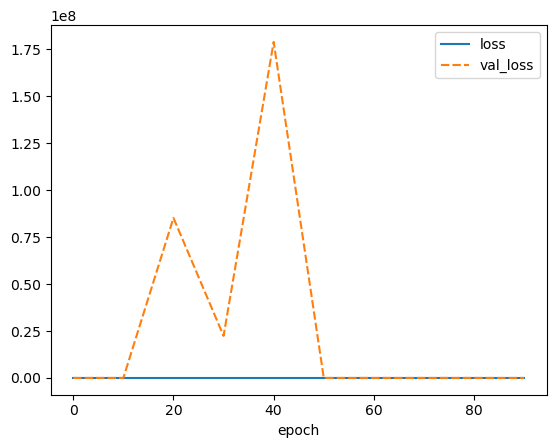

best weights loaded


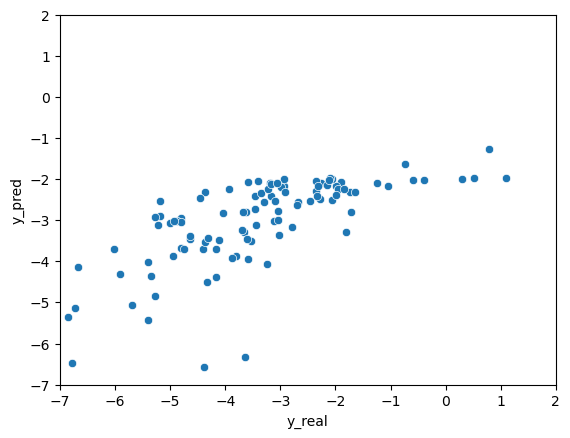

elapsed time: 56.406678676605225
run: 47
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B79075C2B0>, <dgl.data.utils.Subset object at 0x000001B87D2A8CA0>, <dgl.data.utils.Subset object at 0x000001B87D2A8F10>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): 

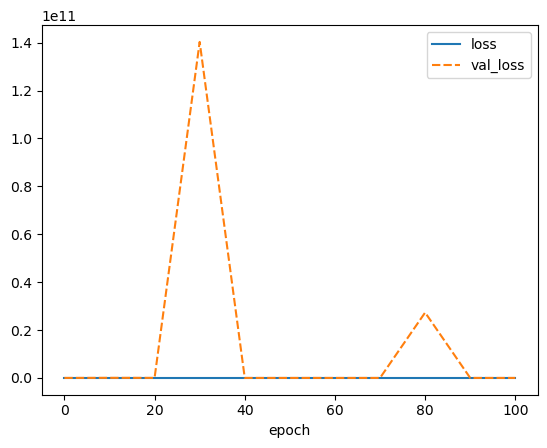

best weights loaded


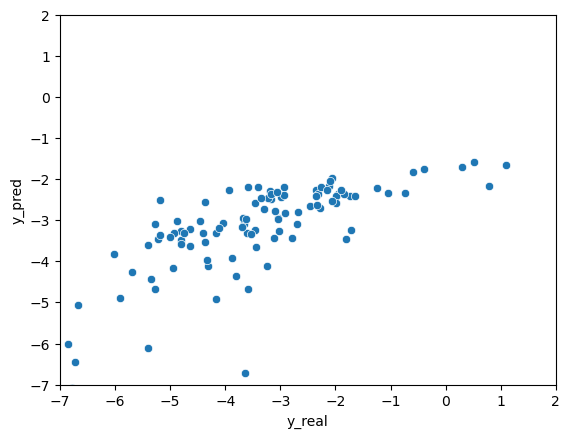

elapsed time: 56.498455286026
run: 48
{'hidden_feats': [512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B878BA5160>, <dgl.data.utils.Subset object at 0x000001B7E4CE84F0>, <dgl.data.utils.Subset object at 0x000001B7E4CE8AC0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=1024, out_features=128, bias=True)
      (2): ReLU()
      (3): Batch

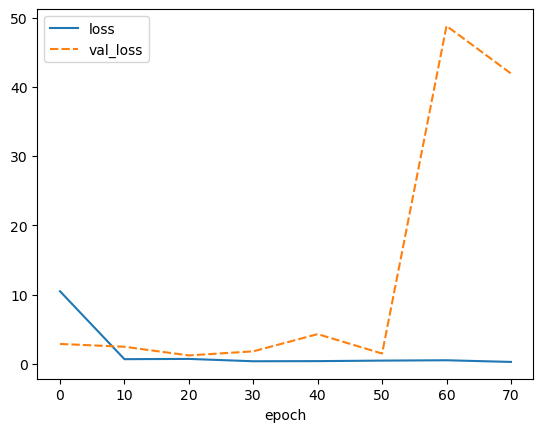

best weights loaded


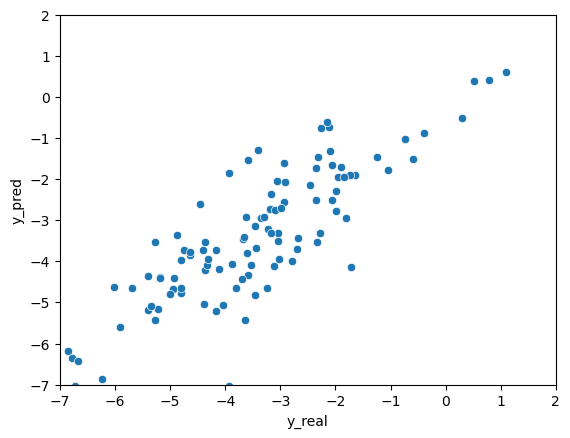

elapsed time: 22.339340448379517
run: 49
{'hidden_feats': [512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B7E4E58D30>, <dgl.data.utils.Subset object at 0x000001B879D443A0>, <dgl.data.utils.Subset object at 0x000001B879D44B20>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=1024, out_features=256, bias=True)
      (2): ReLU()
      (3): Ba

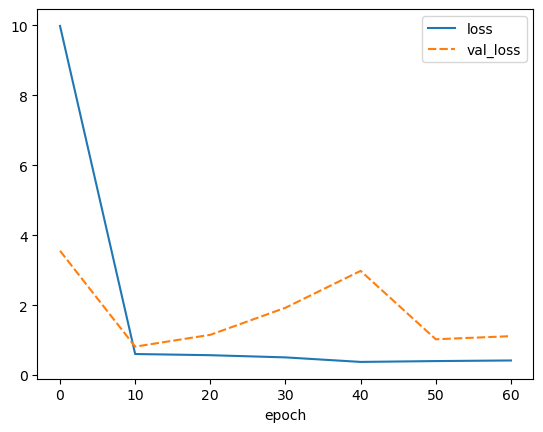

best weights loaded


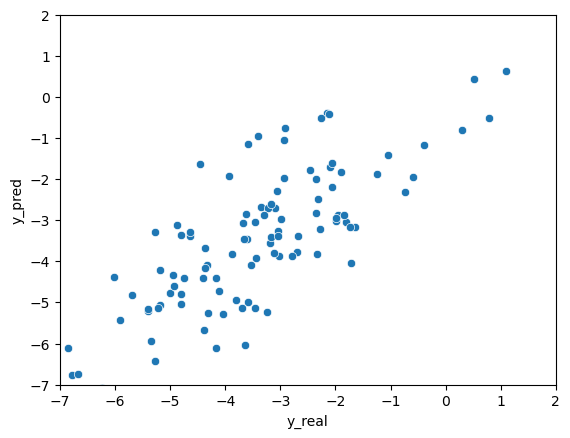

elapsed time: 24.003138542175293
run: 50
{'hidden_feats': [512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790B71D30>, <dgl.data.utils.Subset object at 0x000001B879D42520>, <dgl.data.utils.Subset object at 0x000001B879D42790>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=1024, out_features=512, bias=True)
      (2): ReLU()
      (3): Ba

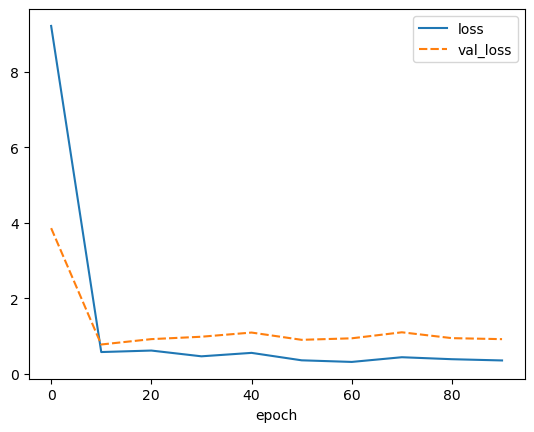

best weights loaded


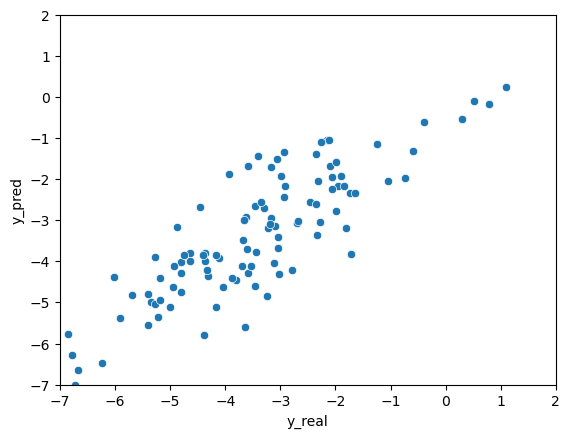

elapsed time: 32.26245737075806
run: 51
{'hidden_feats': [512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B878B46B20>, <dgl.data.utils.Subset object at 0x000001B879C039A0>, <dgl.data.utils.Subset object at 0x000001B879D34550>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=1024, out_features=1024, bias=True)
      (2): ReLU()
      (3): B

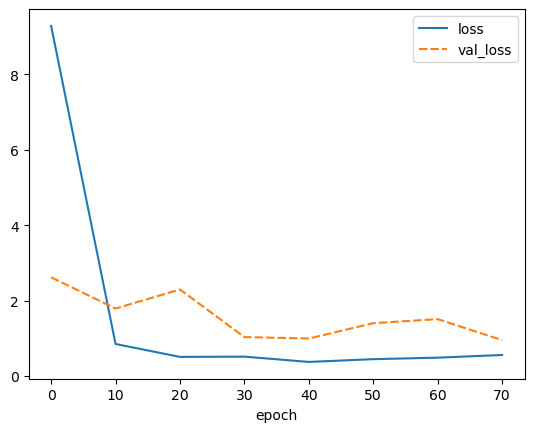

best weights loaded


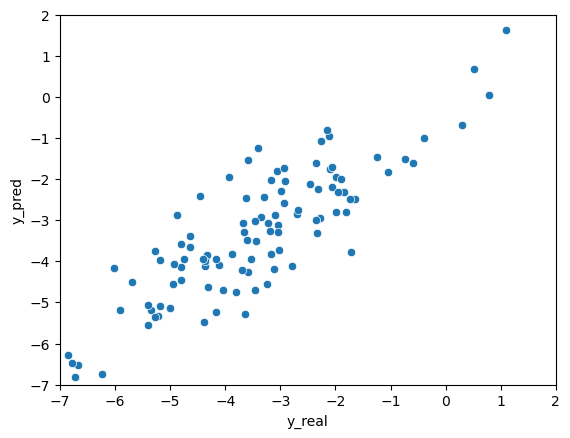

elapsed time: 28.320865154266357
run: 52
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790926F40>, <dgl.data.utils.Subset object at 0x000001B790968C10>, <dgl.data.utils.Subset object at 0x000001B790968F70>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )

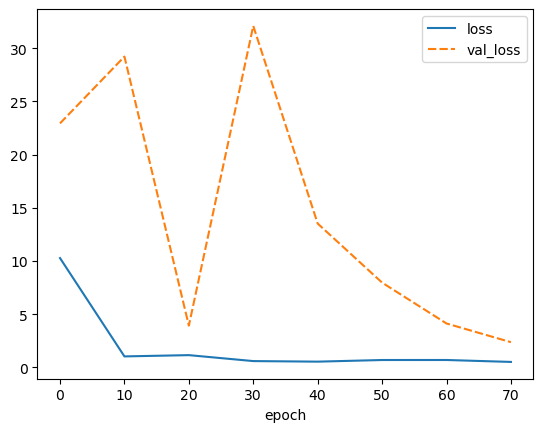

best weights loaded


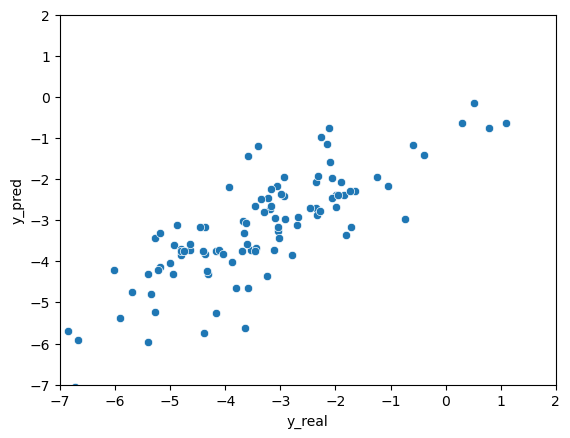

elapsed time: 27.399880170822144
run: 53
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B879CD00A0>, <dgl.data.utils.Subset object at 0x000001B879BEBC70>, <dgl.data.utils.Subset object at 0x000001B879BEBEE0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )

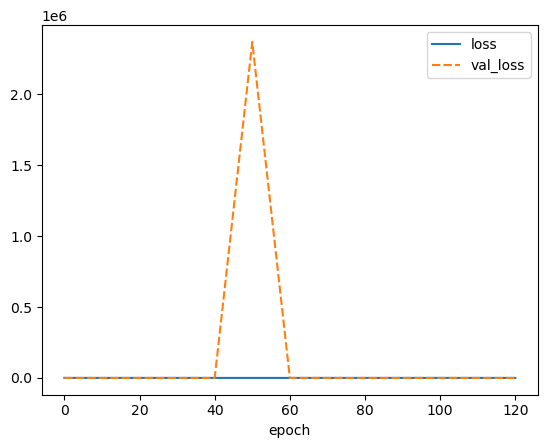

best weights loaded


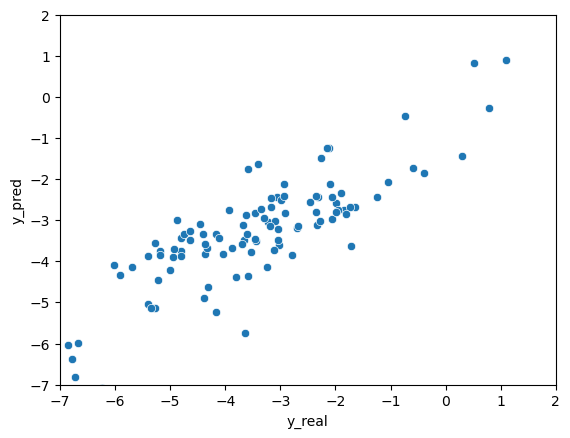

elapsed time: 48.93404221534729
run: 54
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790A67BE0>, <dgl.data.utils.Subset object at 0x000001B87D301100>, <dgl.data.utils.Subset object at 0x000001B87D301370>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )


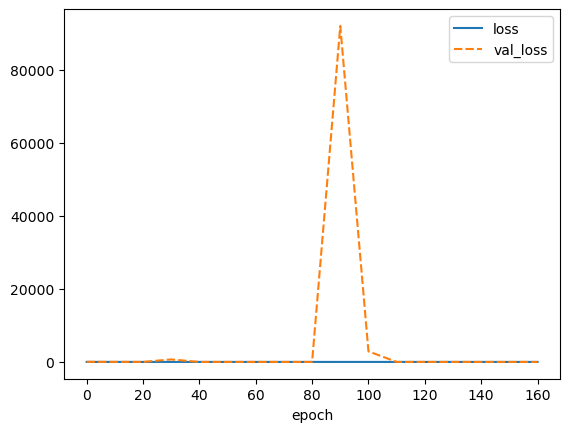

best weights loaded


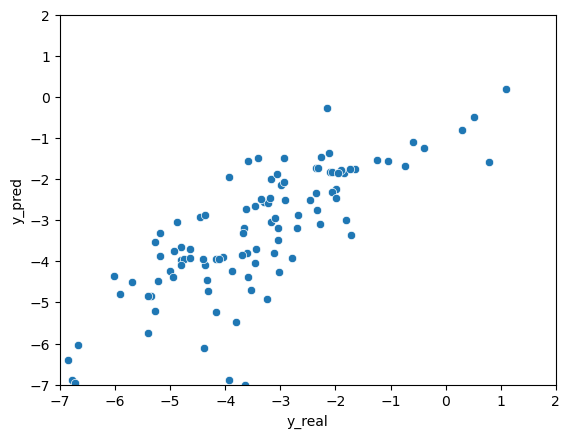

elapsed time: 70.08480048179626
run: 55
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B7E4E9D400>, <dgl.data.utils.Subset object at 0x000001B87D2EACA0>, <dgl.data.utils.Subset object at 0x000001B87D2EA6A0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )

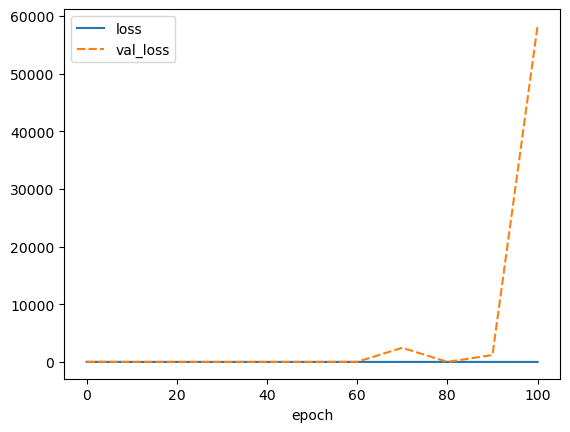

best weights loaded


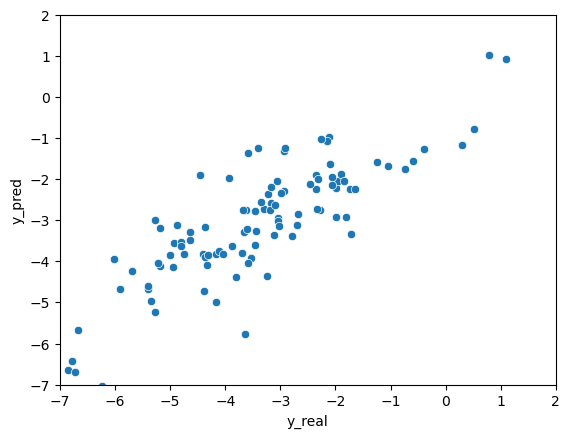

elapsed time: 45.81211805343628
run: 56
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790B21490>, <dgl.data.utils.Subset object at 0x000001B87D41B1F0>, <dgl.data.utils.Subset object at 0x000001B87D41B460>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid

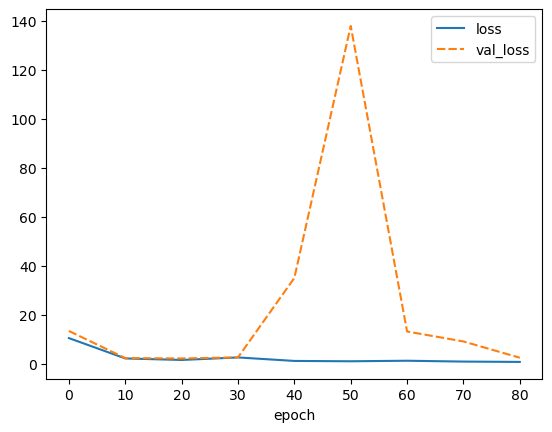

best weights loaded


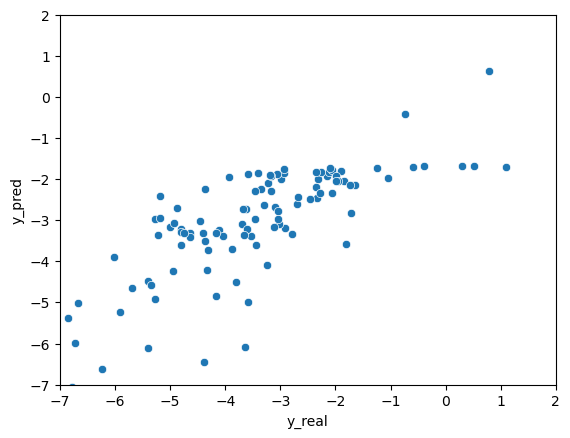

elapsed time: 39.09300184249878
run: 57
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B790980E80>, <dgl.data.utils.Subset object at 0x000001B79070C070>, <dgl.data.utils.Subset object at 0x000001B879CE96D0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid

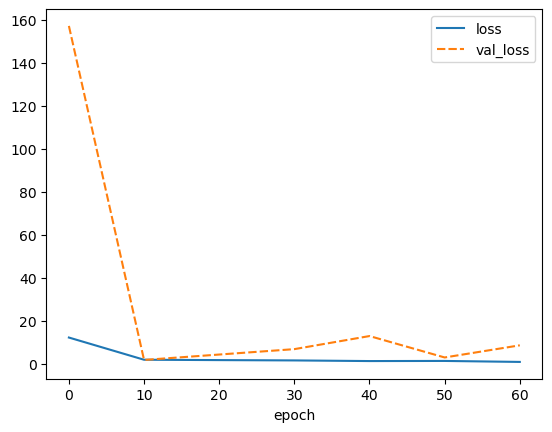

best weights loaded


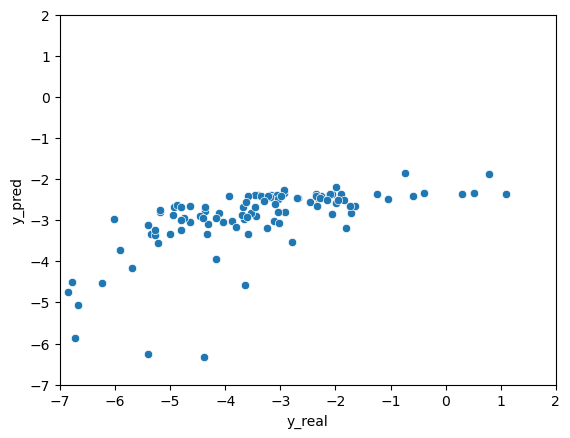

elapsed time: 30.843746185302734
run: 58
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B878A64C10>, <dgl.data.utils.Subset object at 0x000001B87BE59F10>, <dgl.data.utils.Subset object at 0x000001B87BE59490>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoi

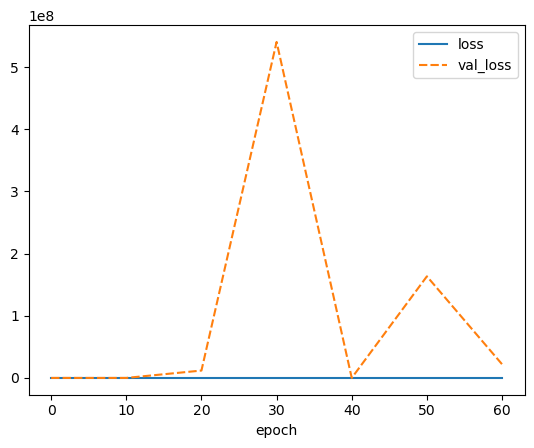

best weights loaded


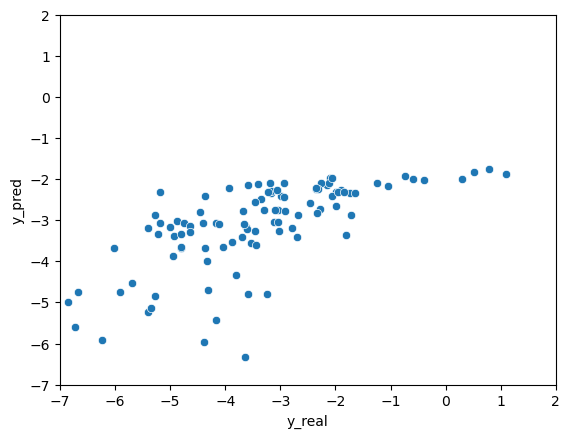

elapsed time: 30.885093927383423
run: 59
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B878856520>, <dgl.data.utils.Subset object at 0x000001B7E4E66490>, <dgl.data.utils.Subset object at 0x000001B7E4E66700>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmo

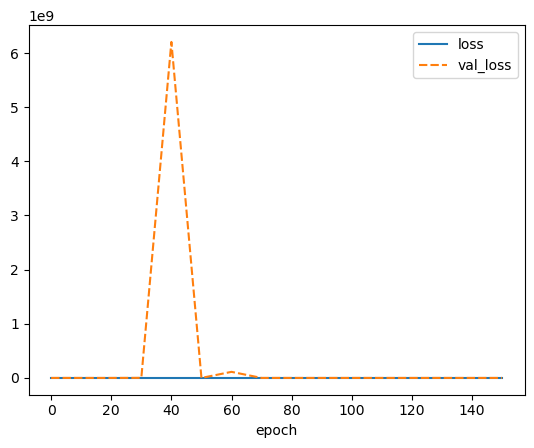

best weights loaded


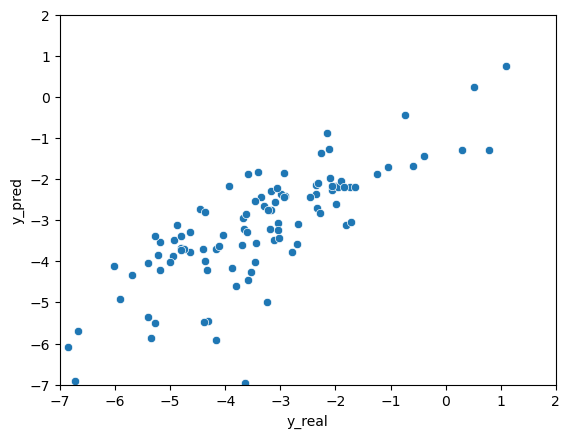

elapsed time: 72.54490852355957
run: 60
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B7E4E9CEB0>, <dgl.data.utils.Subset object at 0x000001B7E8E95220>, <dgl.data.utils.Subset object at 0x000001B7E8E95BB0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Si

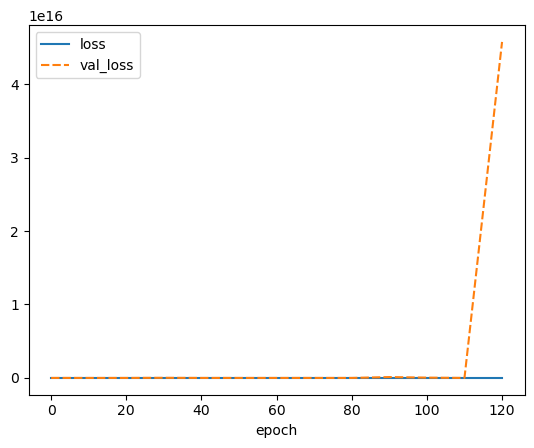

best weights loaded


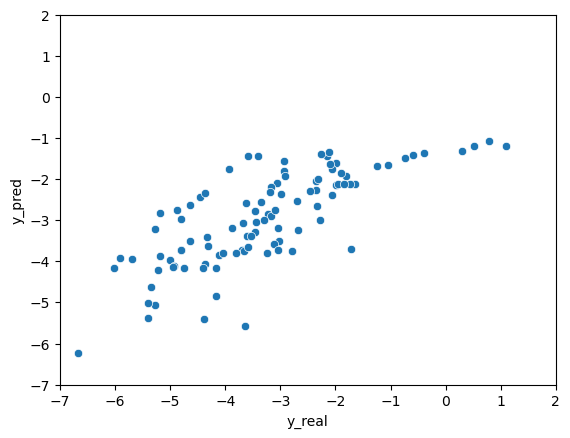

elapsed time: 65.07501530647278
run: 61
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B8789B3BE0>, <dgl.data.utils.Subset object at 0x000001B87BE18A00>, <dgl.data.utils.Subset object at 0x000001B87BE181C0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Si

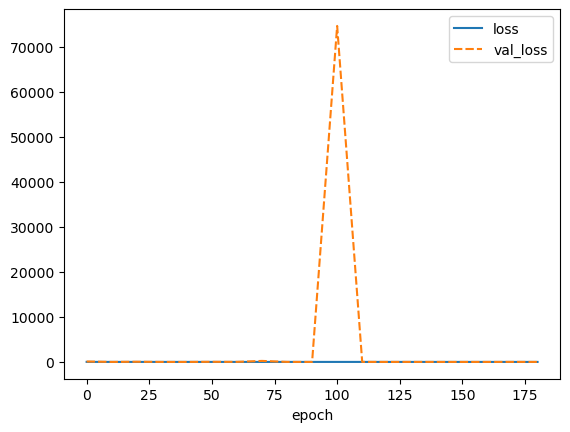

best weights loaded


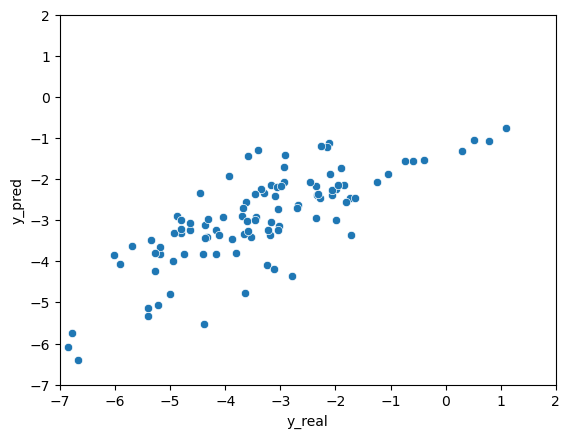

elapsed time: 86.30561089515686
run: 62
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B7906BC910>, <dgl.data.utils.Subset object at 0x000001B879D4AA00>, <dgl.data.utils.Subset object at 0x000001B879D4ACD0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Si

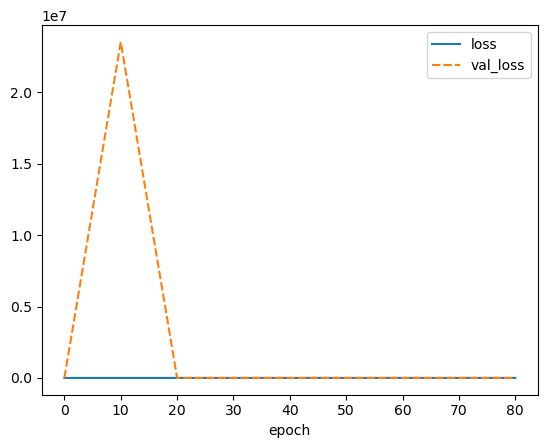

best weights loaded


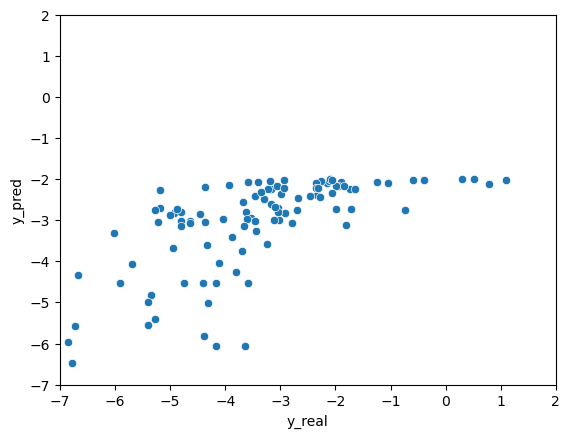

elapsed time: 39.24760365486145
run: 63
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000001B8787DF160>, <dgl.data.utils.Subset object at 0x000001B879D122E0>, <dgl.data.utils.Subset object at 0x000001B879D12550>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001B7857E0E50>)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): S

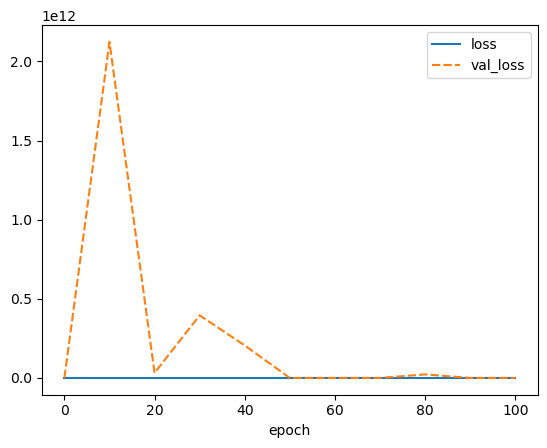

best weights loaded


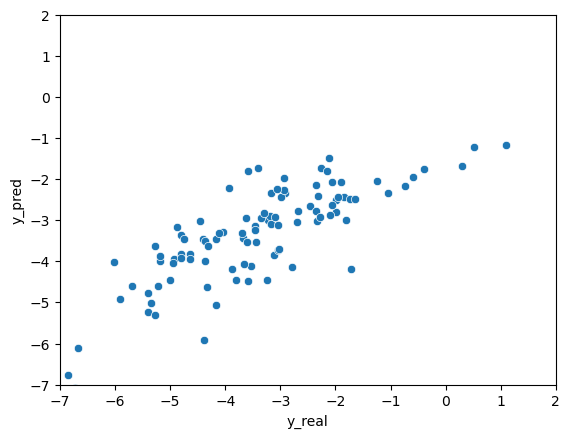

elapsed time: 46.442986249923706


In [14]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()
    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    '''
    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 
    '''
    hidden_feats = combination_dict["hidden_feats"]
    predictor_hidden_feats = combination_dict["predictor_hidden_feats"]

    if create_new_data:
        data, data_y = load_esol()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, apply_scaffold_split = apply_scaffold_split )
        #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
        loader, test_loader = create_dgl_dataloader(train_dataset, test_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_reg_esol.pkl'
        else: 
            loader_file = 'datasets_reg_esol.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders

        train_dataset, test_dataset, val_dataset = create_dgl_sets(datasets=[train_dataset, test_dataset, val_dataset])

        '''
        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)

        else:
        '''
            
        #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
        loader, test_loader, val_loader = create_dgl_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    residual = len(hidden_feats) * [False]
    batchnorm = len(hidden_feats) * [False]

    #if not use_fingerprints:
    #model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate)
    model, device, optimizer, loss_fn = initialize_dgl_regression_model(in_feats=train_dataset[0][0].ndata["h"].shape[-1], hidden_feats=hidden_feats, gnn_norm=None, activation=None, residual=residual, batchnorm=batchnorm, dropout=None, classifier_dropout=0.0, n_tasks=1, predictor_hidden_feats=predictor_hidden_feats, predictor_dropout=0.0)

    #model, best_model_weights, losses, val_losses = regression_train(model, loader, test_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
    model, best_model_weights, losses, val_losses = regression_dgl_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
    
    plt.show()
    #mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)
    mean_mse, mean_l1, dfs = predict_dgl_regression(model, test_loader, device, best_model_weights, plot_final = True)

    '''
    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, test_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)
    '''


    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #regression
    save_dict["mean_mse"] = mean_mse
    save_dict["mean_l1"] = mean_l1

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    '''
    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names
    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp
    '''

    save_dict["hidden_feats"] = hidden_feats
    save_dict["predictor_hidden_feats"] = predictor_hidden_feats

    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    